In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.dummy import DummyRegressor


# Importing Dataset

In [2]:
partial_dfs = [ pd.read_excel("data/FinalMarksDataset.xlsx", sheet_name=i) for i in range(6) ]

In [3]:
df = pd.concat(partial_dfs)

In [4]:
df

Unnamed: 0       As:1       As:2       As:3   As:4        As:5  \
0            1  61.923077  86.428571  81.666667  81.00   49.166667   
1            2  55.769231  97.142857  43.333333  70.00   67.083333   
2            3  86.923077  88.571429   0.000000  94.00   66.666667   
3            4  46.923077  62.142857   0.000000  44.00    0.000000   
4            5  80.000000  95.714286  80.555556  90.00  100.000000   
..         ...        ...        ...        ...    ...         ...   
46          47   0.000000   0.000000   0.000000   0.00         NaN   
47          48  70.500000  76.666667  73.000000  76.25         NaN   
48          49  41.500000   0.000000  88.000000  90.00         NaN   
49          50  32.000000  80.000000  77.000000  82.50         NaN   
50          51  43.500000   0.000000  75.000000  88.75         NaN   

          As:6   Qz:1       Qz:2    Qz:3   Qz:4  Qz:5   Qz:6        Qz:7  \
0    78.333333   70.0  33.333333   20.00   80.0   0.0   50.0   75.000000   
1    78.888889   50.0  46.666667    0.00  100.0  70.0  100.0   83.333333   
2    88.888889   70.0  16.666667   10.00   10.0  20.0   20.0  100.000000   
3    55.555556   30.0  33.333333    5.00    0.0   0.0   20.0   25.000000   
4   100.000000  100.0  70.000000  100.00  100.0  65.0  100.0   75.000000   
..         ...    ...        ...     ...    ...   ...    ...         ...   
46         NaN   50.0   0.000000   18.75    0.0   0.0    0.0         NaN   
47         NaN   15.0  70.000000   37.50    0.0  10.0   40.0         NaN   
48         NaN   60.0  20.000000   37.50    0.0   0.0   30.0         NaN   
49         NaN    0.0   0.000000   43.75   60.0  25.0    0.0         NaN   
50         NaN    0.0  20.000000   18.75   20.0   5.0   40.0         NaN   

     Qz:8        S-I       S-II      Final  Proj  
0   100.0  43.733333  15.600000  35.733333   NaN  
1   100.0  31.200000  27.466667  53.488889   NaN  
2   100.0  23.733333  16.200000  32.488889   NaN  
3     0.0  46.200000  22.466667  28.000000   NaN  
4   100.0  71.200000  43.733333  74.733333   NaN  
..    ...        ...        ...        ...   ...  
46    NaN  49.133333  18.133333  23.133333   NaN  
47    NaN  55.000000  47.200000  62.822222   NaN  
48    NaN  57.466667  37.200000  51.488889   NaN  
49    NaN  47.466667  54.466667  53.733333   NaN  
50    NaN  43.333333  51.733333  52.311111   NaN  

[254 rows x 19 columns]

## Removing Index Column

In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.columns

Index(['As:1', 'As:2', 'As:3', 'As:4', 'As:5', 'As:6', 'Qz:1', 'Qz:2', 'Qz:3',
       'Qz:4', 'Qz:5', 'Qz:6', 'Qz:7', 'Qz:8', 'S-I', 'S-II', 'Final', 'Proj'],
      dtype='object')

# Data Description

In [7]:
df.describe()


As:1        As:2        As:3        As:4        As:5        As:6  \
count  254.000000  254.000000  254.000000  254.000000  152.000000   62.000000   
mean    56.766244   59.902231   64.694335   60.935499   61.901042   68.142921   
std     28.112890   31.761446   26.459035   32.502959   31.665489   29.631618   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     38.000000   51.500000   53.250000   44.250000   49.166667   56.354167   
50%     61.500000   72.250000   71.833333   70.000000   70.416667   76.388889   
75%     80.769231   82.000000   84.166667   86.916667   87.500000   88.888889   
max     99.000000  100.000000   99.166667  100.000000  100.000000  100.000000   

             Qz:1        Qz:2        Qz:3        Qz:4        Qz:5        Qz:6  \
count  254.000000  254.000000  254.000000  254.000000  254.000000  254.000000   
mean    46.318898   34.140420   42.244094   39.718898   36.948819   43.110236   
std     31.184341   28.828967   28.025582   33.145941   30.678128   31.603579   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     16.250000   10.000000   20.000000   10.000000   10.000000   10.000000   
50%     50.000000   30.000000   43.750000   35.000000   30.000000   40.000000   
75%     70.000000   50.000000   60.000000   60.000000   60.000000   70.000000   
max    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   

             Qz:7        Qz:8         S-I        S-II       Final       Proj  
count  152.000000   62.000000  254.000000  254.000000  254.000000  44.000000  
mean    41.584430   93.548387   44.794751   38.767192   44.245801  55.212121  
std     29.327726   24.767560   17.175087   22.057860   19.122385  29.396346  
min      0.000000    0.000000    3.733333    0.000000    5.450000   0.000000  
25%     19.791667  100.000000   31.666667   20.950000   31.743750  38.750000  
50%     41.666667  100.000000   45.000000   35.800000   43.444444  65.000000  
75%     58.333333  100.000000   56.200000   54.466667   57.277778  76.250000  
max    100.000000  100.000000   93.333333  100.000000   91.755556  95.000000

## Correlations

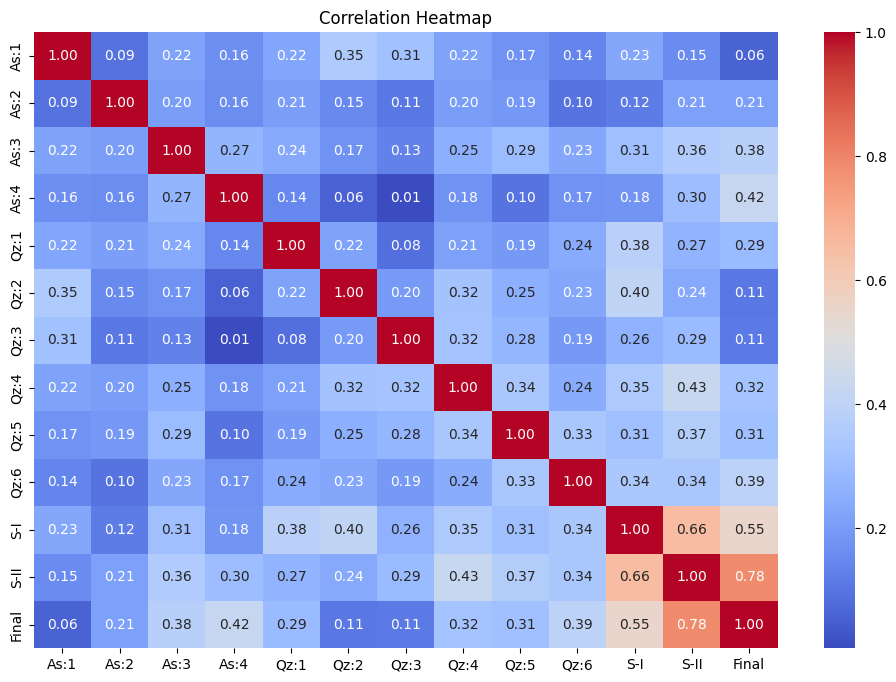

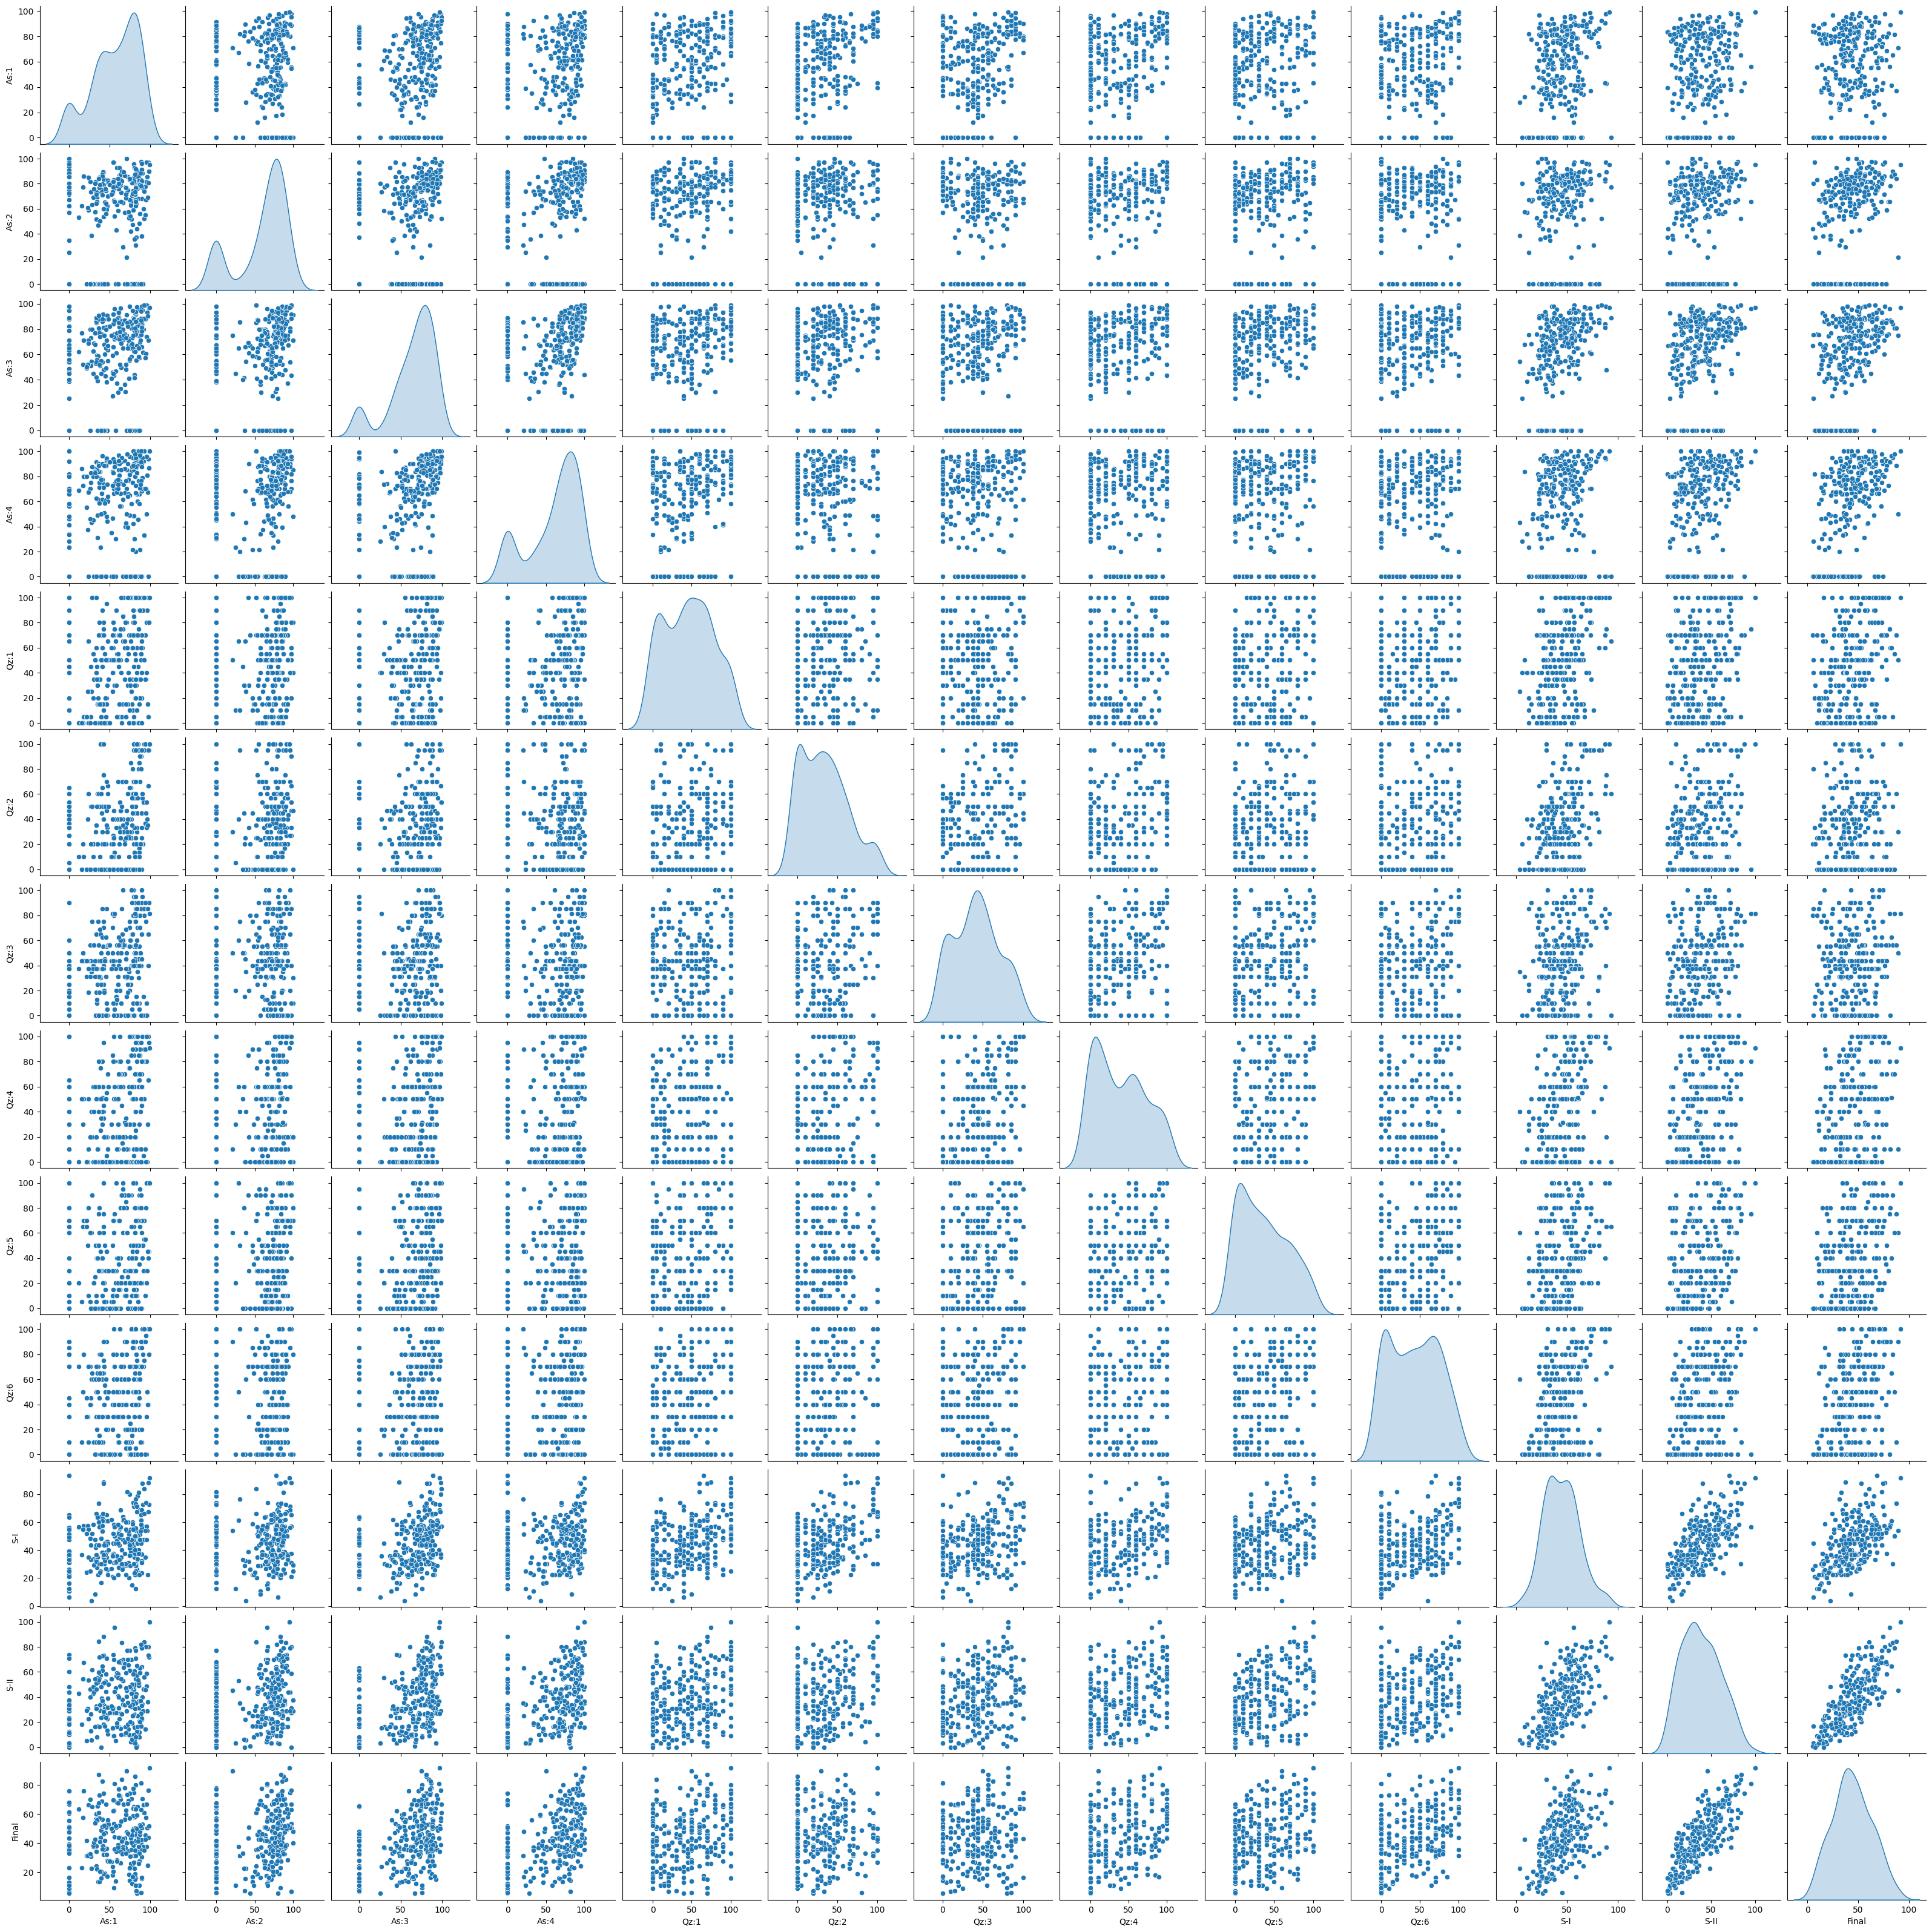

In [8]:
cols_to_use = [
    'As:1','As:2','As:3','As:4',
    'Qz:1','Qz:2','Qz:3','Qz:4','Qz:5','Qz:6',
    'S-I','S-II'
]

plt.figure(figsize=(12, 8))
sns.heatmap(df[cols_to_use + ["Final"]].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df[cols_to_use + ["Final"]], diag_kind="kde")
plt.show()

## RQ 3

### Model 1 - Raw Values with Imputed Data


----- Multiple Linear Regression (Raw Columns, Imputed) -----
Intercept: 9.666071228478593

Coefficients:
As:1: -0.0613
As:2: -0.0140
As:3: 0.0291
As:4: 0.0763
As:5: 0.0140
As:6: 0.0902
Qz:1: 0.0173
Qz:2: -0.0686
Qz:3: -0.0687
Qz:4: -0.0115
Qz:5: 0.0066
Qz:6: 0.0729
Qz:7: 0.0464
Qz:8: 0.0013
S-I: 0.1096
S-II: 0.5300

R²: 0.7454
Adjusted R²: 0.2928
RMSE: 10.4076
MAE: 8.4575
MAPE: 25.51%

----- Constant Baseline Model -----
R²: -0.0011
RMSE: 20.6386


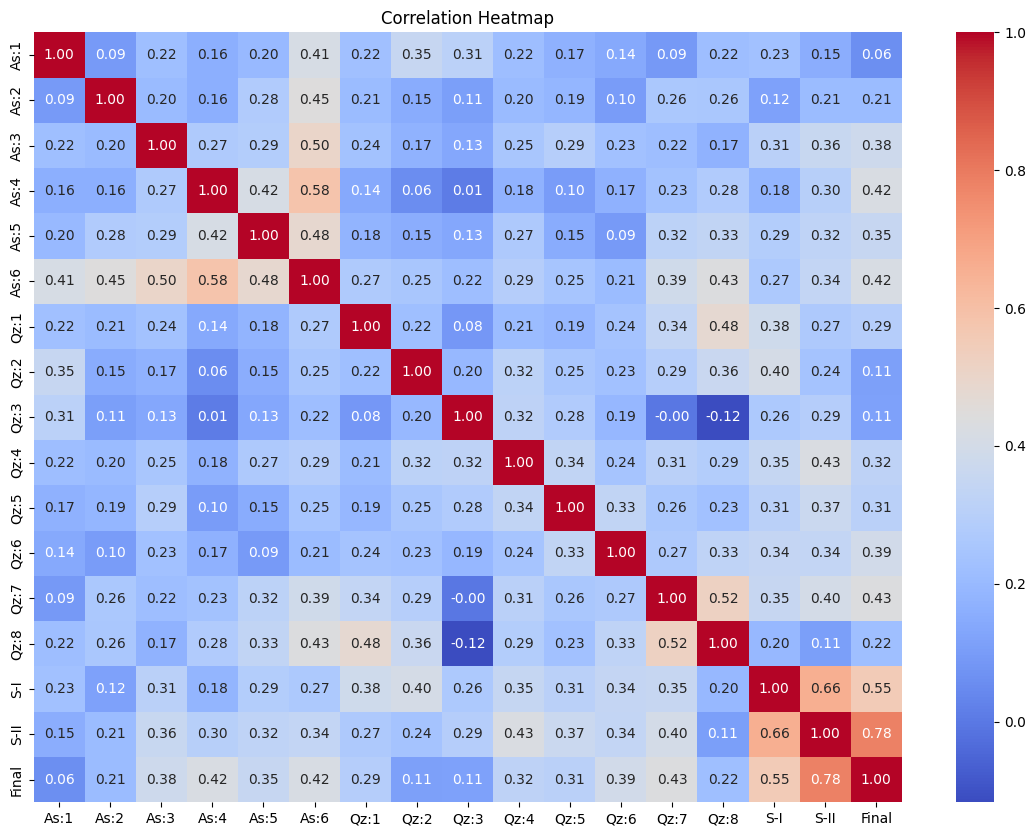

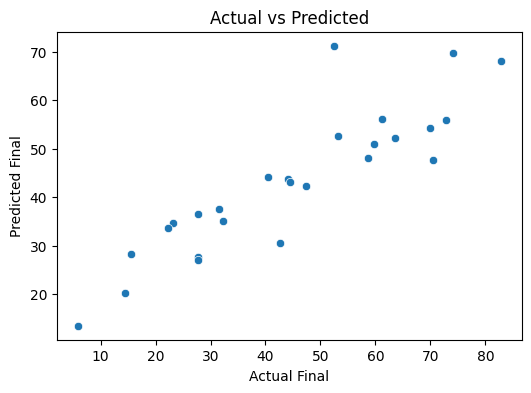

In [9]:
# --------------------------
# 1. REPLACE MISSING VALUES
# --------------------------

# Assignments
as_mean = df[["As:1", "As:2", "As:3", "As:4"]].mean(axis=1)
df["As:5"] = df["As:5"].fillna(as_mean)
df["As:6"] = df["As:6"].fillna(as_mean)

# Quizzes
qz_mean = df[["Qz:1", "Qz:2", "Qz:3", "Qz:4", "Qz:5", "Qz:6"]].mean(axis=1)
df["Qz:7"] = df["Qz:7"].fillna(qz_mean)
df["Qz:8"] = df["Qz:8"].fillna(qz_mean)

# --------------------------
# 2. SELECT RAW FEATURES
# --------------------------

cols_to_use = [
    "As:1","As:2","As:3","As:4","As:5","As:6",
    "Qz:1","Qz:2","Qz:3","Qz:4","Qz:5","Qz:6","Qz:7","Qz:8",
    "S-I","S-II"
]

X = df[cols_to_use]
y = df["Final"]

# --------------------------
# 3. TRAIN-TEST SPLIT (90/10)
# --------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42
)

# --------------------------
# 4. MULTIPLE LINEAR REGRESSION
# --------------------------

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --------------------------
# 5. METRICS
# --------------------------

def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, len(y_test), X_test.shape[1])
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\n----- Multiple Linear Regression (Raw Columns, Imputed) -----")
print("Intercept:", model.intercept_)
print("\nCoefficients:")
for col, coef in zip(cols_to_use, model.coef_):
    print(f"{col}: {coef:.4f}")

print(f"\nR²: {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

# --------------------------
# 6. CONSTANT BASELINE MODEL
# --------------------------

constant_pred = np.full_like(y_test, y_train.mean())

r2_const = r2_score(y_test, constant_pred)
rmse_const = np.sqrt(mean_squared_error(y_test, constant_pred))

print("\n----- Constant Baseline Model -----")
print(f"R²: {r2_const:.4f}")
print(f"RMSE: {rmse_const:.4f}")

# --------------------------
# 7. VISUALIZATIONS
# --------------------------

# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df[cols_to_use + ["Final"]].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Actual vs Predicted scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Final")
plt.ylabel("Predicted Final")
plt.title("Actual vs Predicted")
plt.show()


### Model 2 - Collapsed Model with Imputed Values (No Quizzes)


----- Best-of-Both-Worlds Linear Model (No Quizzes) -----
Intercept: 10.594360537235083

Coefficients:
As_Mean: 0.1215
S-I: 0.0743
S-II: 0.5855

R²: 0.6229
Adjusted R²: 0.5715
RMSE: 12.6660
MAE: 10.2966
MAPE: 38.40%

----- Constant Baseline Model -----
R²: -0.0011
RMSE: 20.6386


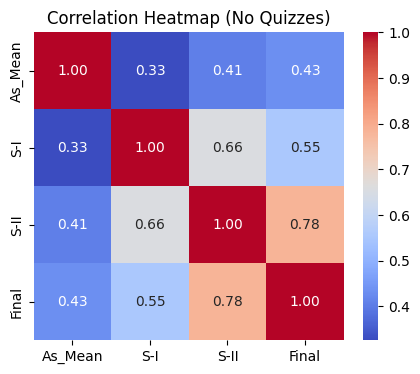

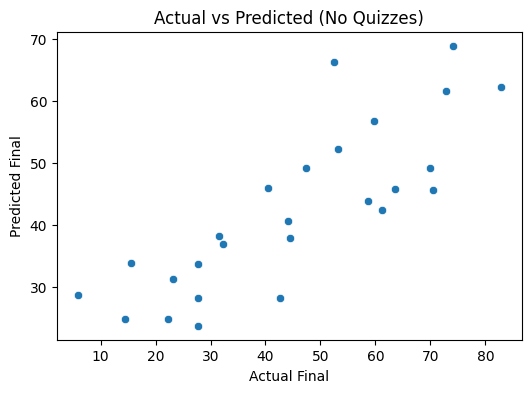

In [10]:
# --------------------------
# 1. IMPUTE MISSING VALUES
# --------------------------

as_mean_raw = df[["As:1","As:2","As:3","As:4"]].mean(axis=1)
df["As:5"] = df["As:5"].fillna(as_mean_raw)
df["As:6"] = df["As:6"].fillna(as_mean_raw)

# --------------------------
# 2. CREATE COLLAPSED FEATURES
# --------------------------

df["As_Mean"] = df[["As:1","As:2","As:3","As:4"]].mean(axis=1)

# --------------------------
# 3. SELECT PREDICTORS (No Quizzes)
# --------------------------

cols_to_use = ["As_Mean", "S-I", "S-II"]
X = df[cols_to_use]
y = df["Final"]

# --------------------------
# 4. TRAIN-TEST SPLIT
# --------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42
)

# --------------------------
# 5. FIT LINEAR REGRESSION
# --------------------------

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --------------------------
# 6. METRICS
# --------------------------

def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2)*(n-1)/(n-k-1))

r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, len(y_test), X_test.shape[1])
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred)/y_test)) * 100

print("\n----- Best-of-Both-Worlds Linear Model (No Quizzes) -----")
print("Intercept:", model.intercept_)
print("\nCoefficients:")
for col, coef in zip(cols_to_use, model.coef_):
    print(f"{col}: {coef:.4f}")

print(f"\nR²: {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

# --------------------------
# 7. CONSTANT BASELINE MODEL
# --------------------------

constant_pred = np.full_like(y_test, y_train.mean())
r2_const = r2_score(y_test, constant_pred)
rmse_const = np.sqrt(mean_squared_error(y_test, constant_pred))

print("\n----- Constant Baseline Model -----")
print(f"R²: {r2_const:.4f}")
print(f"RMSE: {rmse_const:.4f}")

# --------------------------
# 8. VISUALIZATIONS
# --------------------------

# Correlation heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(df[cols_to_use + ["Final"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (No Quizzes)")
plt.show()

# Actual vs Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Final")
plt.ylabel("Predicted Final")
plt.title("Actual vs Predicted (No Quizzes)")
plt.show()


### Model 3 - The reason we did not include Quiz means in Model 2


----- Multiple Linear Regression (Collapsed Predictors) -----
Intercept: 10.790228201597571

Coefficients:
As_Mean: 0.1087
Qz_Mean: -0.0220
S-I: 0.0863
S-II: 0.5957

R²: 0.6218
Adjusted R²: 0.5498
RMSE: 12.6847
MAE: 10.3115
MAPE: 38.23%

----- Constant Baseline Model -----
R²: -0.0011
RMSE: 20.6386


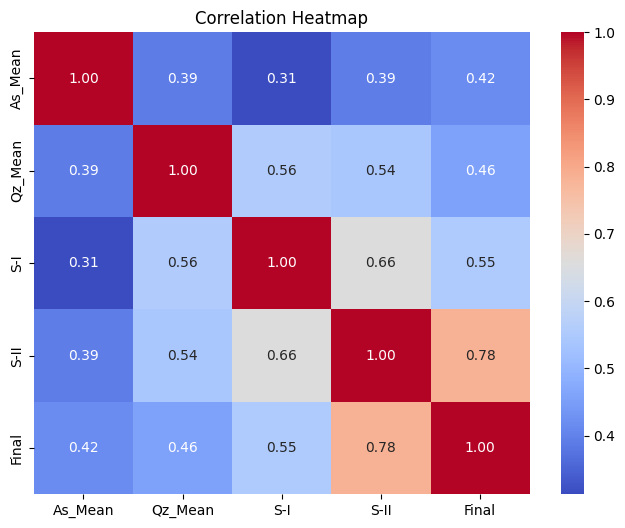

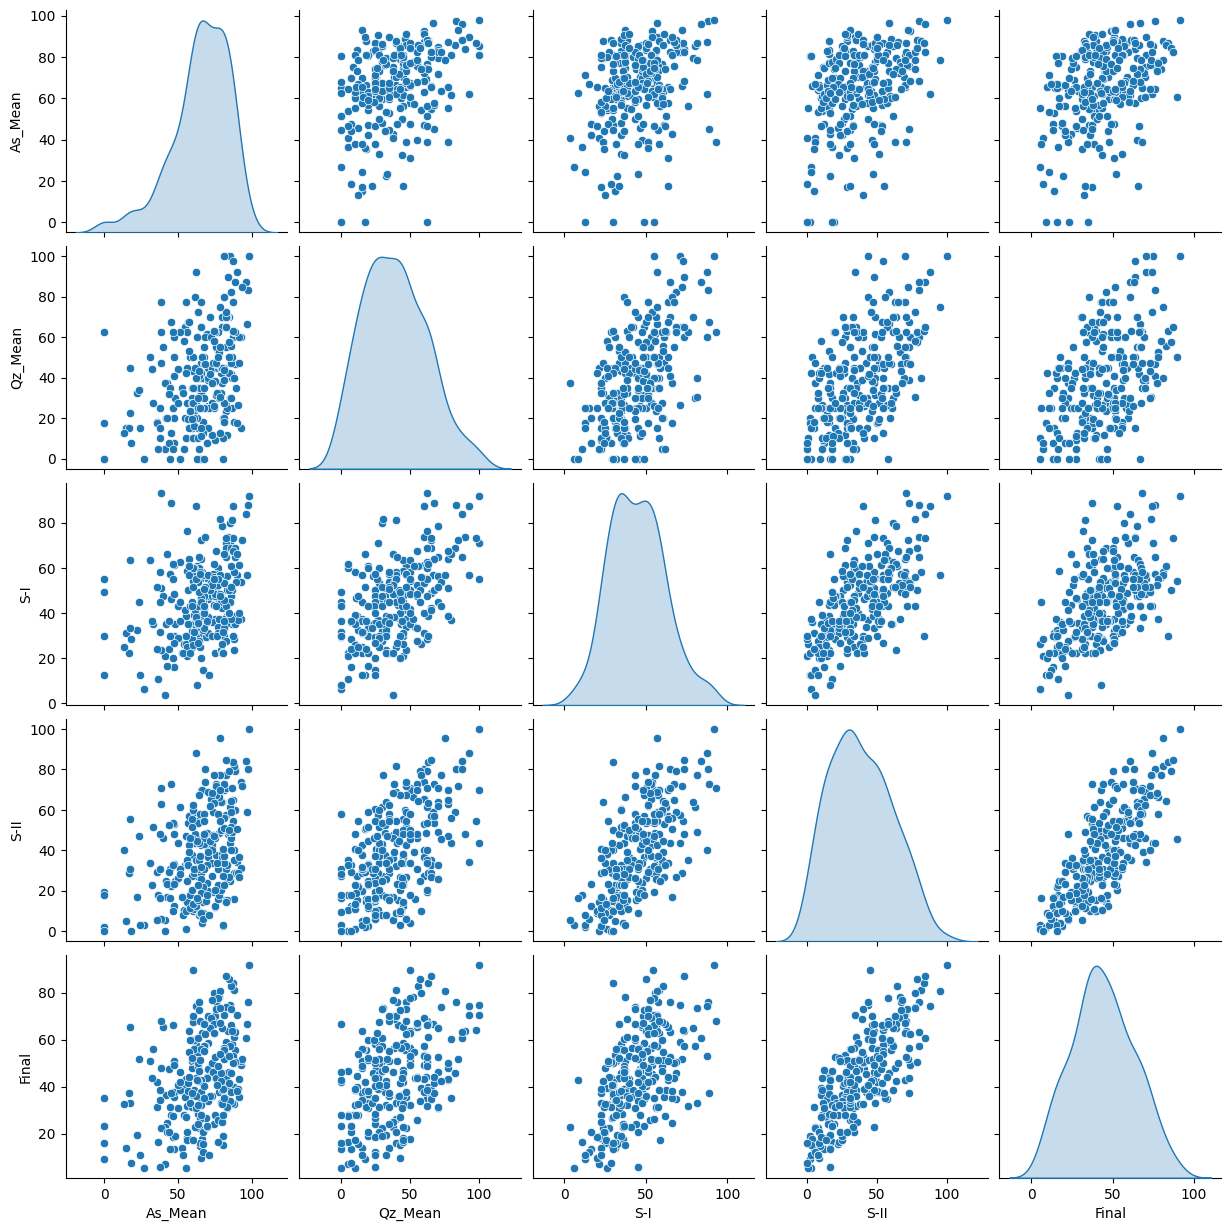

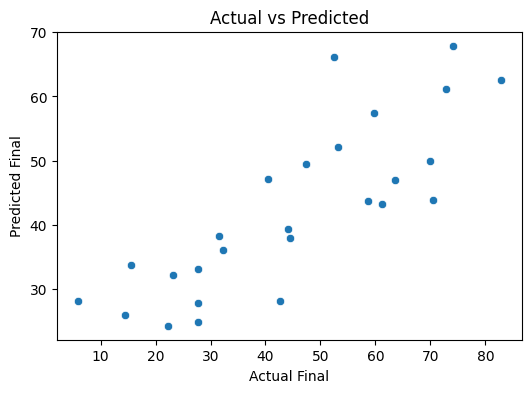

In [11]:
# ------------------------------------------------
# 1. CREATE NEW MEAN COLUMNS
# ------------------------------------------------

df["As_Mean"] = df[["As:1", "As:2", "As:3", "As:4"]].median(axis=1)
df["Qz_Mean"] = df[["Qz:1", "Qz:2", "Qz:3", "Qz:4", "Qz:5", "Qz:6"]].median(axis=1)

# ------------------------------------------------
# 2. SELECT FEATURES
# ------------------------------------------------

cols_to_use = ["As_Mean", "Qz_Mean", "S-I", "S-II"]

X = df[cols_to_use]
y = df["Final"]

# ------------------------------------------------
# 3. TRAIN-TEST SPLIT (90/10)
# ------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42
)

# ------------------------------------------------
# 4. MULTIPLE LINEAR REGRESSION MODEL
# ------------------------------------------------

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ------------------------------------------------
# 5. METRICS
# ------------------------------------------------

def adjusted_r2(r2, n, k):
    return 1 - ((1-r2)*(n-1)/(n-k-1))

r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, len(y_test), X_test.shape[1])
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\n----- Multiple Linear Regression (Collapsed Predictors) -----")
print("Intercept:", model.intercept_)
print("\nCoefficients:")
for col, coef in zip(cols_to_use, model.coef_):
    print(f"{col}: {coef:.4f}")

print(f"\nR²: {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

# ------------------------------------------------
# 6. BASELINE MODEL
# ------------------------------------------------

constant_pred = np.full_like(y_test, y_train.mean())

r2_const = r2_score(y_test, constant_pred)
rmse_const = np.sqrt(mean_squared_error(y_test, constant_pred))

print("\n----- Constant Baseline Model -----")
print(f"R²: {r2_const:.4f}")
print(f"RMSE: {rmse_const:.4f}")

# ------------------------------------------------
# 7. VISUALIZATIONS
# ------------------------------------------------

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[cols_to_use + ["Final"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(df[cols_to_use + ["Final"]], diag_kind="kde")
plt.show()

# Actual vs Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Final")
plt.ylabel("Predicted Final")
plt.title("Actual vs Predicted")
plt.show()


## Our Conclusion

We would recommend the second model because we believe that the first model is overfitting the training data as the coeffecients of some fields are negative which does not seem to be logical in the real world. Hence we recommend the second model which uses collapsed fields like the average of Assignments, S-I and S-II. The reason we have omitted Quizzes from the model is because the model with Quizz gave us a negative coefficient which means that the quiz data is noisy.

# RQ1: How accurately can we predict students marks in Midterm 1. 
We will assume that till sessional 1, we had 2 assignments adn 2 quizzes. 

Dataset size for RQ1: 254 rows
Features available before Midterm I: As:1, As:2, Qz:1, Qz:2

Feature Correlations with Midterm I (S-I)
S-I     1.000000
Qz:2    0.402652
Qz:1    0.383878
As:1    0.231439
As:2    0.115477
Name: S-I, dtype: float64

MODEL 1: Multiple Linear Regression (Raw Features)

Train set size: 203
Test set size: 51

Coefficients:
  As:1: 0.0279
  As:2: -0.0173
  Qz:1: 0.1793
  Qz:2: 0.1924
  Intercept: 29.0664

Training Metrics:
  R²: 0.2636
  RMSE: 14.8867
  MAE: 11.8917
  Adjusted R²: 0.2488

Testing Metrics:
  R²: 0.2059
  RMSE: 14.4453
  MAE: 12.0393
  Adjusted R²: 0.1368

MODEL 2: Multiple Linear Regression (Collapsed Features)

Coefficients:
  As_Mean: 0.0039
  Qz_Mean: 0.3762
  Intercept: 29.1564

Training Metrics:
  R²: 0.2606
  RMSE: 14.9170
  MAE: 11.9128
  Adjusted R²: 0.2532

Testing Metrics:
  R²: 0.2095
  RMSE: 14.4121
  MAE: 11.9780
  Adjusted R²: 0.1766

COMPARISON TABLE - RQ1: Midterm I Prediction

                       Model  Train R²  Test R²  Tra

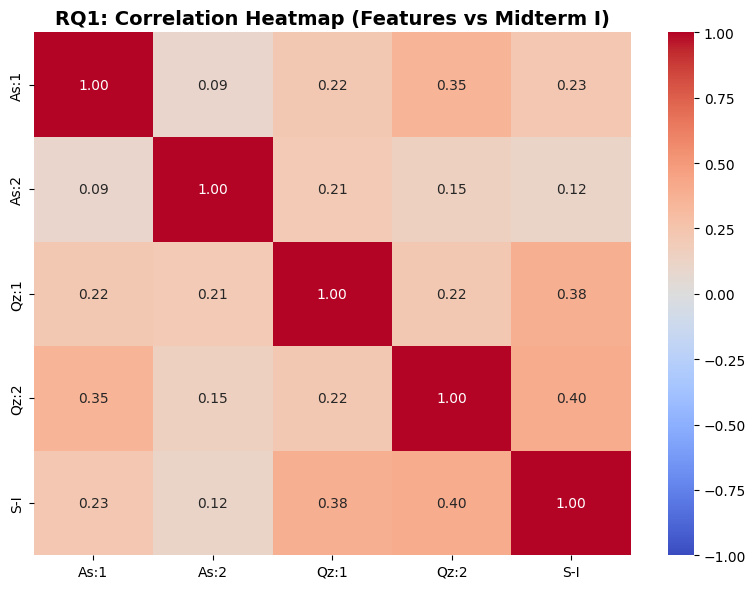

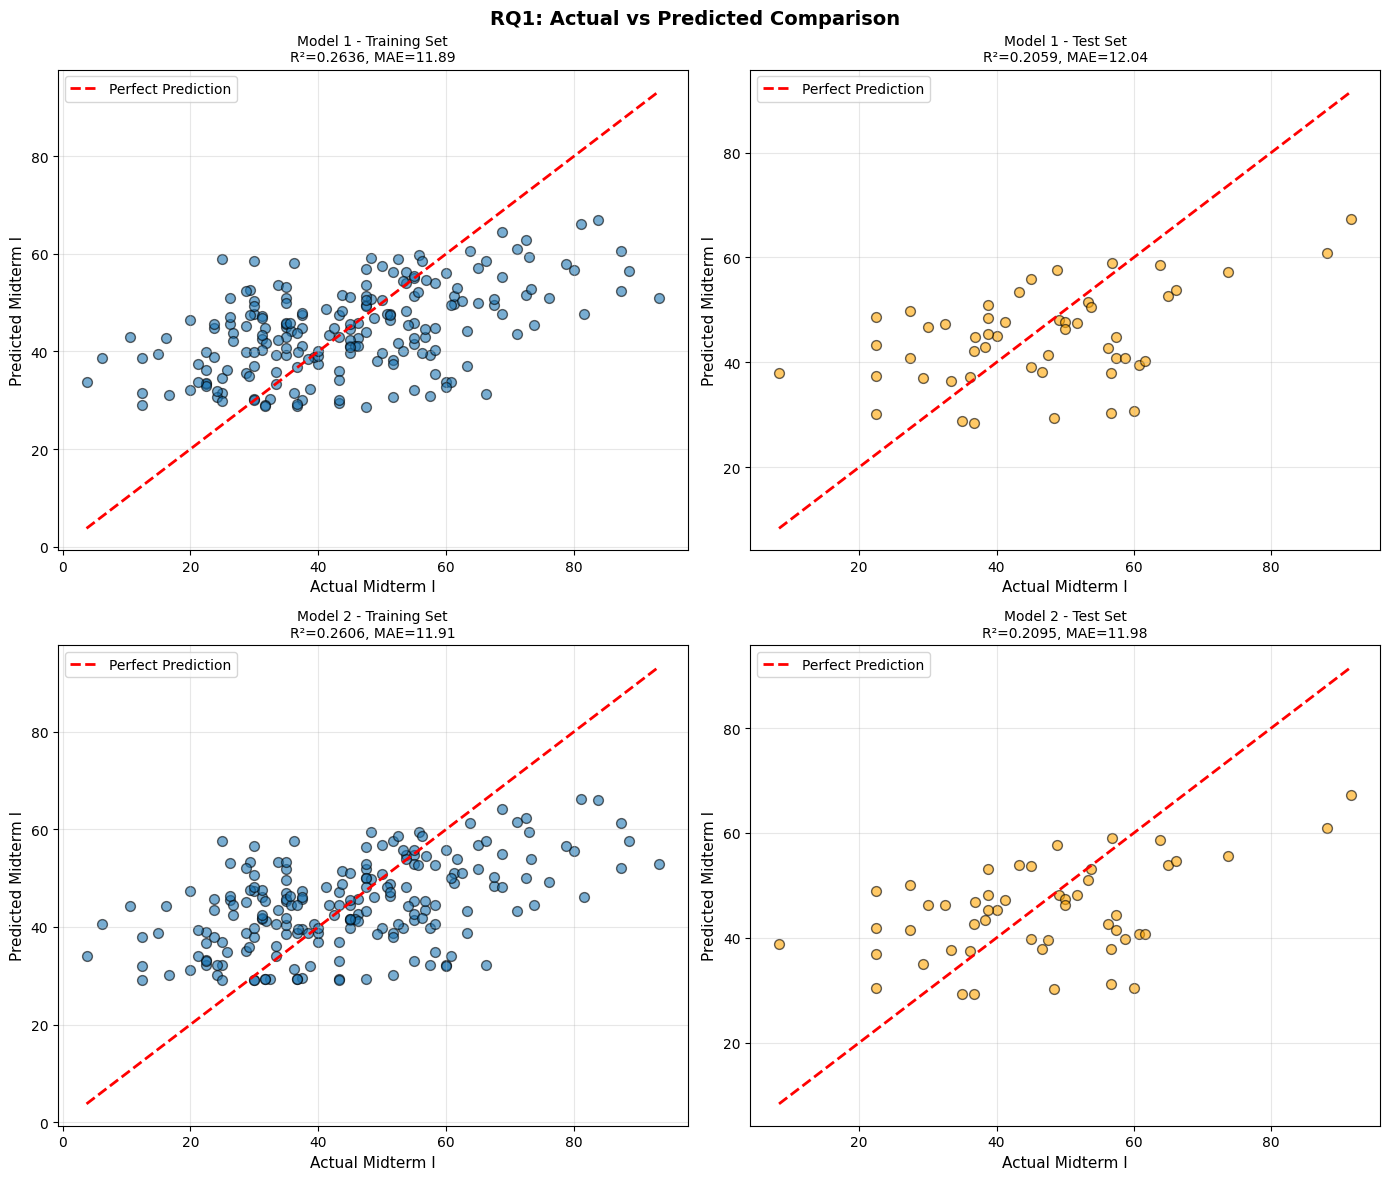

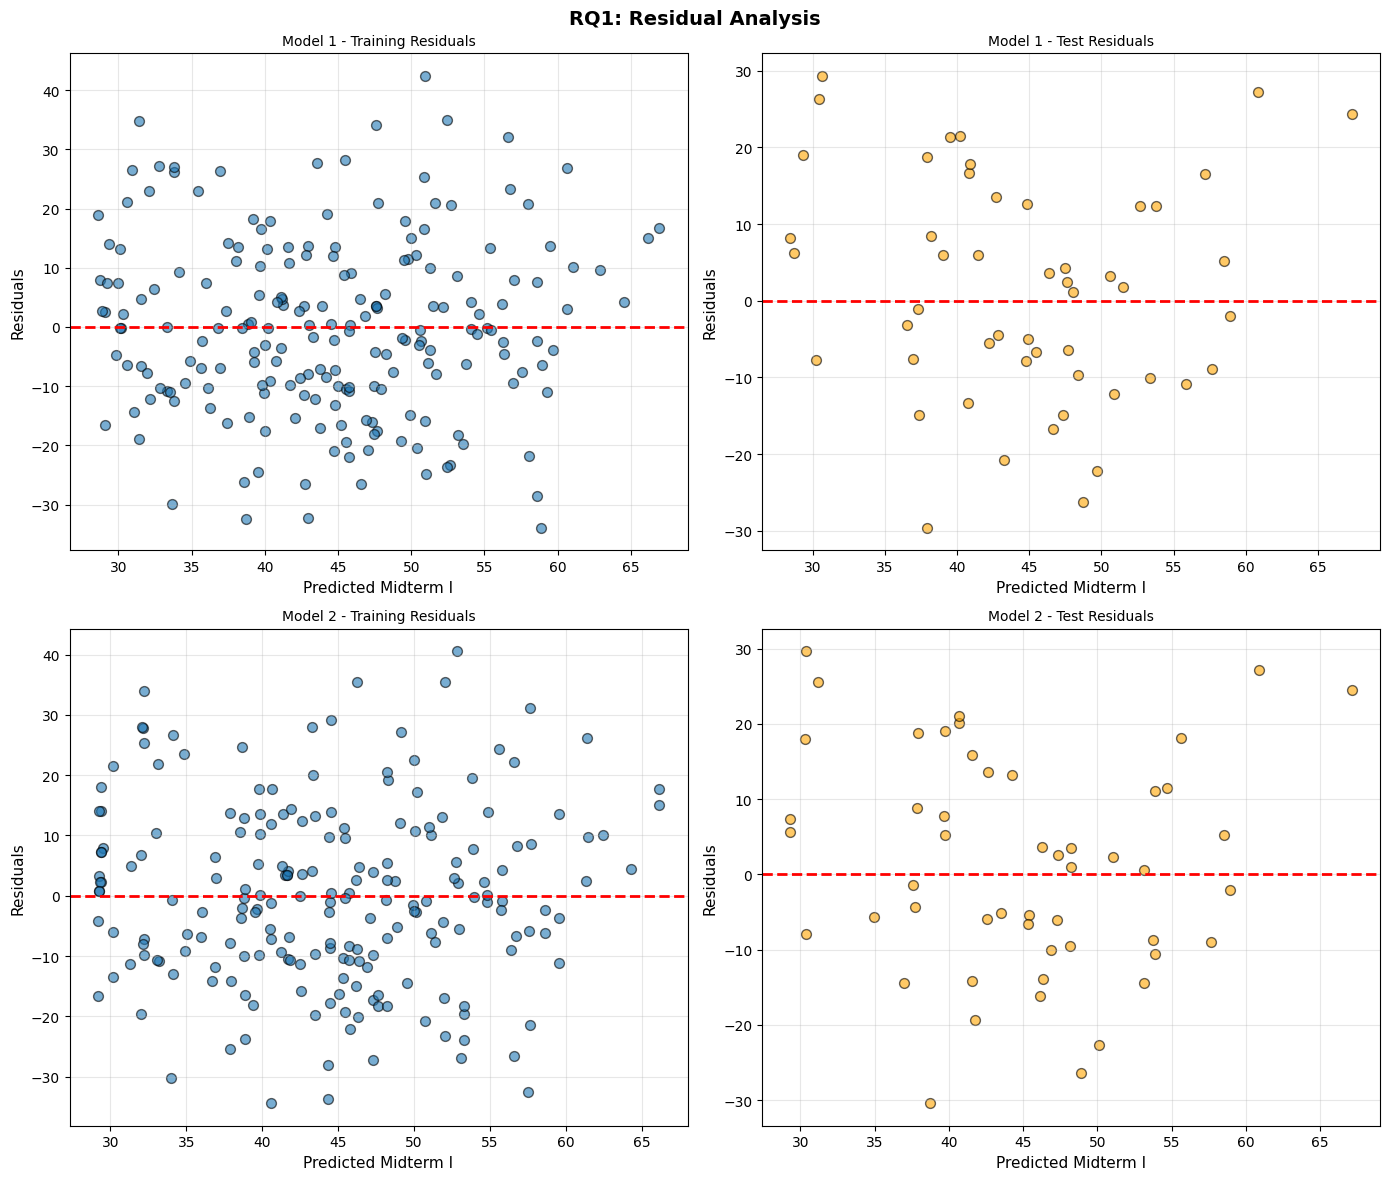

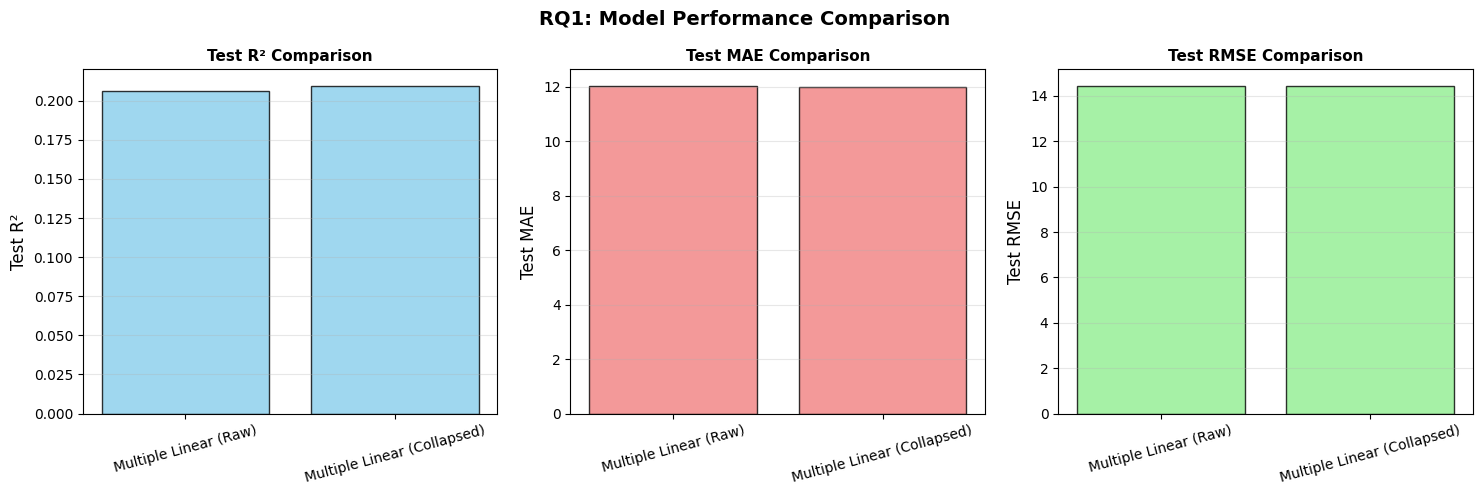


✅ RQ1 Analysis Complete!


In [14]:
# ============================================================================
# RQ1: Predicting Midterm I (S-I) Marks
# ============================================================================


# Load data (assuming df is already loaded and cleaned)
# df = df.drop('Unnamed: 0', axis=1)

# --------------------------
# DATA PREPARATION FOR RQ1
# --------------------------
# ASSUMPTION: Till Sessional 1 (Midterm I), we had:
# - 2 Assignments (As:1, As:2)
# - 2 Quizzes (Qz:1, Qz:2)

# Drop rows where S-I is missing (our target)
df_rq1 = df.dropna(subset=['S-I']).copy()

print(f"Dataset size for RQ1: {len(df_rq1)} rows")
print(f"Features available before Midterm I: As:1, As:2, Qz:1, Qz:2")

# Check correlations
print("\n" + "="*70)
print("Feature Correlations with Midterm I (S-I)")
print("="*70)
corr_data = df_rq1[['As:1', 'As:2', 'Qz:1', 'Qz:2', 'S-I']].corr()['S-I'].sort_values(ascending=False)
print(corr_data)

# --------------------------
# Helper Function
# --------------------------
def calculate_metrics(y_true, y_pred, X_shape=None, dataset_name=""):
    """Calculate and print regression metrics"""
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"\n{dataset_name} Metrics:")
    print(f"  R²: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    
    if X_shape is not None:
        # Adjusted R²
        n = len(y_true)
        k = X_shape[1]
        if n > k + 1:
            adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
            print(f"  Adjusted R²: {adj_r2:.4f}")
    
    return {"R2": r2, "RMSE": rmse, "MAE": mae}

# --------------------------
# MODEL 1: Multiple Linear Regression (Raw Features)
# --------------------------
print("\n" + "="*70)
print("MODEL 1: Multiple Linear Regression (Raw Features)")
print("="*70)

# Features: Only 2 assignments and 2 quizzes (before Midterm I)
cols_model1 = ["As:1", "As:2", "Qz:1", "Qz:2"]

X1 = df_rq1[cols_model1]
y1 = df_rq1["S-I"]

# Train-test split (20% for more stable test results)
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.20, random_state=42
)

print(f"\nTrain set size: {len(X1_train)}")
print(f"Test set size: {len(X1_test)}")

# Fit model
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

# Predictions
y1_pred_train = model1.predict(X1_train)
y1_pred_test = model1.predict(X1_test)

print("\nCoefficients:")
for col, coef in zip(cols_model1, model1.coef_):
    print(f"  {col}: {coef:.4f}")
print(f"  Intercept: {model1.intercept_:.4f}")

metrics1_train = calculate_metrics(y1_train, y1_pred_train, X1_train.shape, "Training")
metrics1_test = calculate_metrics(y1_test, y1_pred_test, X1_test.shape, "Testing")

# --------------------------
# MODEL 2: Multiple Linear Regression (Collapsed Features)
# --------------------------
print("\n" + "="*70)
print("MODEL 2: Multiple Linear Regression (Collapsed Features)")
print("="*70)

# Create aggregated features
df_rq1["As_Mean"] = df_rq1[["As:1", "As:2"]].mean(axis=1)
df_rq1["Qz_Mean"] = df_rq1[["Qz:1", "Qz:2"]].mean(axis=1)

cols_model2 = ["As_Mean", "Qz_Mean"]

X2 = df_rq1[cols_model2]
y2 = df_rq1["S-I"]

# Train-test split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.20, random_state=42
)

# Fit model
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

# Predictions
y2_pred_train = model2.predict(X2_train)
y2_pred_test = model2.predict(X2_test)

print("\nCoefficients:")
for col, coef in zip(cols_model2, model2.coef_):
    print(f"  {col}: {coef:.4f}")
print(f"  Intercept: {model2.intercept_:.4f}")

metrics2_train = calculate_metrics(y2_train, y2_pred_train, X2_train.shape, "Training")
metrics2_test = calculate_metrics(y2_test, y2_pred_test, X2_test.shape, "Testing")

# --------------------------
# COMPARISON TABLE
# --------------------------
print("\n" + "="*70)
print("COMPARISON TABLE - RQ1: Midterm I Prediction")
print("="*70)

comparison_df = pd.DataFrame({
    'Model': [
        'Multiple Linear (Raw)',
        'Multiple Linear (Collapsed)'
    ],
    'Train R²': [
        metrics1_train['R2'],
        metrics2_train['R2']
    ],
    'Test R²': [
        metrics1_test['R2'],
        metrics2_test['R2']
    ],
    'Train MAE': [
        metrics1_train['MAE'],
        metrics2_train['MAE']
    ],
    'Test MAE': [
        metrics1_test['MAE'],
        metrics2_test['MAE']
    ],
    'Train RMSE': [
        metrics1_train['RMSE'],
        metrics2_train['RMSE']
    ],
    'Test RMSE': [
        metrics1_test['RMSE'],
        metrics2_test['RMSE']
    ]
})

print("\n", comparison_df.to_string(index=False))

# Identify best model
best_model_idx = comparison_df['Test R²'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Test R² = {comparison_df.loc[best_model_idx, 'Test R²']:.4f}")
print(f"   Test MAE = {comparison_df.loc[best_model_idx, 'Test MAE']:.4f}")

# Check for overfitting/underfitting
print("\n" + "="*70)
print("Overfitting/Underfitting Analysis")
print("="*70)
for idx, model_name in enumerate(comparison_df['Model']):
    train_r2 = comparison_df.loc[idx, 'Train R²']
    test_r2 = comparison_df.loc[idx, 'Test R²']
    diff = train_r2 - test_r2
    
    print(f"\n{model_name}:")
    print(f"  Train R² - Test R² = {diff:.4f}")
    
    if diff > 0.1:
        print(f"  ⚠️  Possible overfitting (large gap between train and test)")
    elif test_r2 < 0:
        print(f"  ⚠️  Model performs worse than baseline (negative R²)")
    elif train_r2 < 0.3 and test_r2 < 0.3:
        print(f"  ⚠️  Possible underfitting (low performance on both sets)")
    else:
        print(f"  ✓ Reasonable performance")

# --------------------------
# VISUALIZATIONS
# --------------------------

# 1. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_rq1[cols_model1 + ["S-I"]].corr(), annot=True, fmt=".2f", 
            cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("RQ1: Correlation Heatmap (Features vs Midterm I)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Actual vs Predicted for Both Models
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Model 1 - Training
axes[0, 0].scatter(y1_train, y1_pred_train, alpha=0.6, edgecolor='black', s=50)
axes[0, 0].plot([y1_train.min(), y1_train.max()], 
                [y1_train.min(), y1_train.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Midterm I', fontsize=11)
axes[0, 0].set_ylabel('Predicted Midterm I', fontsize=11)
axes[0, 0].set_title(f'Model 1 - Training Set\nR²={metrics1_train["R2"]:.4f}, MAE={metrics1_train["MAE"]:.2f}', fontsize=10)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# Model 1 - Testing
axes[0, 1].scatter(y1_test, y1_pred_test, alpha=0.6, color='orange', edgecolor='black', s=50)
axes[0, 1].plot([y1_test.min(), y1_test.max()], 
                [y1_test.min(), y1_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Actual Midterm I', fontsize=11)
axes[0, 1].set_ylabel('Predicted Midterm I', fontsize=11)
axes[0, 1].set_title(f'Model 1 - Test Set\nR²={metrics1_test["R2"]:.4f}, MAE={metrics1_test["MAE"]:.2f}', fontsize=10)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# Model 2 - Training
axes[1, 0].scatter(y2_train, y2_pred_train, alpha=0.6, edgecolor='black', s=50)
axes[1, 0].plot([y2_train.min(), y2_train.max()], 
                [y2_train.min(), y2_train.max()], 'r--', lw=2, label='Perfect Prediction')
axes[1, 0].set_xlabel('Actual Midterm I', fontsize=11)
axes[1, 0].set_ylabel('Predicted Midterm I', fontsize=11)
axes[1, 0].set_title(f'Model 2 - Training Set\nR²={metrics2_train["R2"]:.4f}, MAE={metrics2_train["MAE"]:.2f}', fontsize=10)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

# Model 2 - Testing
axes[1, 1].scatter(y2_test, y2_pred_test, alpha=0.6, color='orange', edgecolor='black', s=50)
axes[1, 1].plot([y2_test.min(), y2_test.max()], 
                [y2_test.min(), y2_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[1, 1].set_xlabel('Actual Midterm I', fontsize=11)
axes[1, 1].set_ylabel('Predicted Midterm I', fontsize=11)
axes[1, 1].set_title(f'Model 2 - Test Set\nR²={metrics2_test["R2"]:.4f}, MAE={metrics2_test["MAE"]:.2f}', fontsize=10)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

plt.suptitle('RQ1: Actual vs Predicted Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 3. Residual Plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

residuals1_train = y1_train - y1_pred_train
residuals1_test = y1_test - y1_pred_test
residuals2_train = y2_train - y2_pred_train
residuals2_test = y2_test - y2_pred_test

# Model 1 - Training residuals
axes[0, 0].scatter(y1_pred_train, residuals1_train, alpha=0.6, edgecolor='black', s=50)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Predicted Midterm I', fontsize=11)
axes[0, 0].set_ylabel('Residuals', fontsize=11)
axes[0, 0].set_title('Model 1 - Training Residuals', fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# Model 1 - Test residuals
axes[0, 1].scatter(y1_pred_test, residuals1_test, alpha=0.6, color='orange', edgecolor='black', s=50)
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Midterm I', fontsize=11)
axes[0, 1].set_ylabel('Residuals', fontsize=11)
axes[0, 1].set_title('Model 1 - Test Residuals', fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# Model 2 - Training residuals
axes[1, 0].scatter(y2_pred_train, residuals2_train, alpha=0.6, edgecolor='black', s=50)
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Predicted Midterm I', fontsize=11)
axes[1, 0].set_ylabel('Residuals', fontsize=11)
axes[1, 0].set_title('Model 2 - Training Residuals', fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# Model 2 - Test residuals
axes[1, 1].scatter(y2_pred_test, residuals2_test, alpha=0.6, color='orange', edgecolor='black', s=50)
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Predicted Midterm I', fontsize=11)
axes[1, 1].set_ylabel('Residuals', fontsize=11)
axes[1, 1].set_title('Model 2 - Test Residuals', fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('RQ1: Residual Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 4. Model Comparison Bar Chart
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics_to_plot = ['Test R²', 'Test MAE', 'Test RMSE']
colors = ['skyblue', 'lightcoral', 'lightgreen']

for idx, (metric, color) in enumerate(zip(metrics_to_plot, colors)):
    axes[idx].bar(comparison_df['Model'], comparison_df[metric], color=color, edgecolor='black', alpha=0.8)
    axes[idx].set_ylabel(metric, fontsize=12)
    axes[idx].set_title(f'{metric} Comparison', fontsize=11, fontweight='bold')
    axes[idx].tick_params(axis='x', rotation=15)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.suptitle('RQ1: Model Performance Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n✅ RQ1 Analysis Complete!")

# RQ2: How accurately can we predict student marks in Midterm II?
We will assume that till sessional 2, we had 3 assignments, 4 quiz and sessional 1.

Dataset size for RQ2: 254 rows
Features available before Midterm II: As:1, As:2, As:3, Qz:1, Qz:2, Qz:3, Qz:4, S-I

Feature Correlations with Midterm II (S-II)
S-II    1.000000
S-I     0.657011
Qz:4    0.425672
As:3    0.355967
Qz:3    0.292373
Qz:1    0.269226
Qz:2    0.237329
As:2    0.208307
As:1    0.154458
Name: S-II, dtype: float64

MODEL 1: Multiple Linear Regression (Raw Features)

Train set size: 203
Test set size: 51

Coefficients:
  As:1: -0.0456
  As:2: 0.0387
  As:3: 0.1171
  Qz:1: -0.0268
  Qz:2: -0.0746
  Qz:3: 0.0747
  Qz:4: 0.1290
  S-I: 0.7602
  Intercept: -6.9898

Training Metrics:
  R²: 0.5116
  RMSE: 15.4585
  MAE: 12.6139
  Adjusted R²: 0.4914

Testing Metrics:
  R²: 0.5045
  RMSE: 15.1086
  MAE: 11.6488
  Adjusted R²: 0.4101

MODEL 2: Multiple Linear Regression (Collapsed Features)

Coefficients:
  As_Mean: 0.1132
  Qz_Mean: 0.1023
  S-I: 0.7405
  Intercept: -5.5644

Training Metrics:
  R²: 0.4544
  RMSE: 16.3387
  MAE: 13.3564
  Adjusted R²: 0.4461

Testing Metr

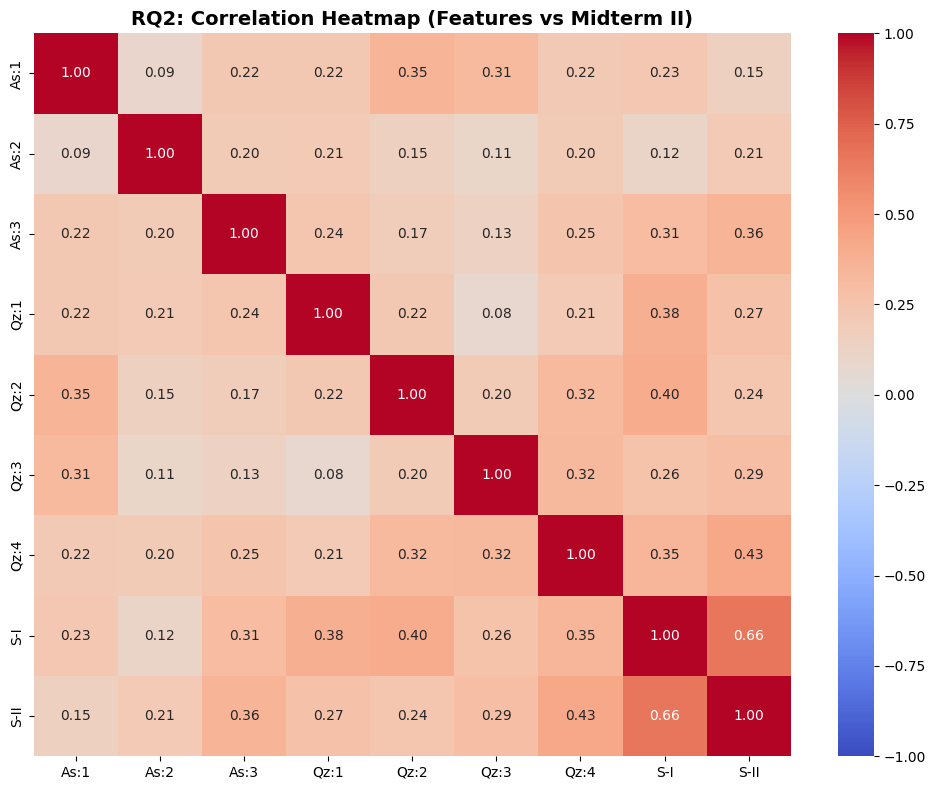

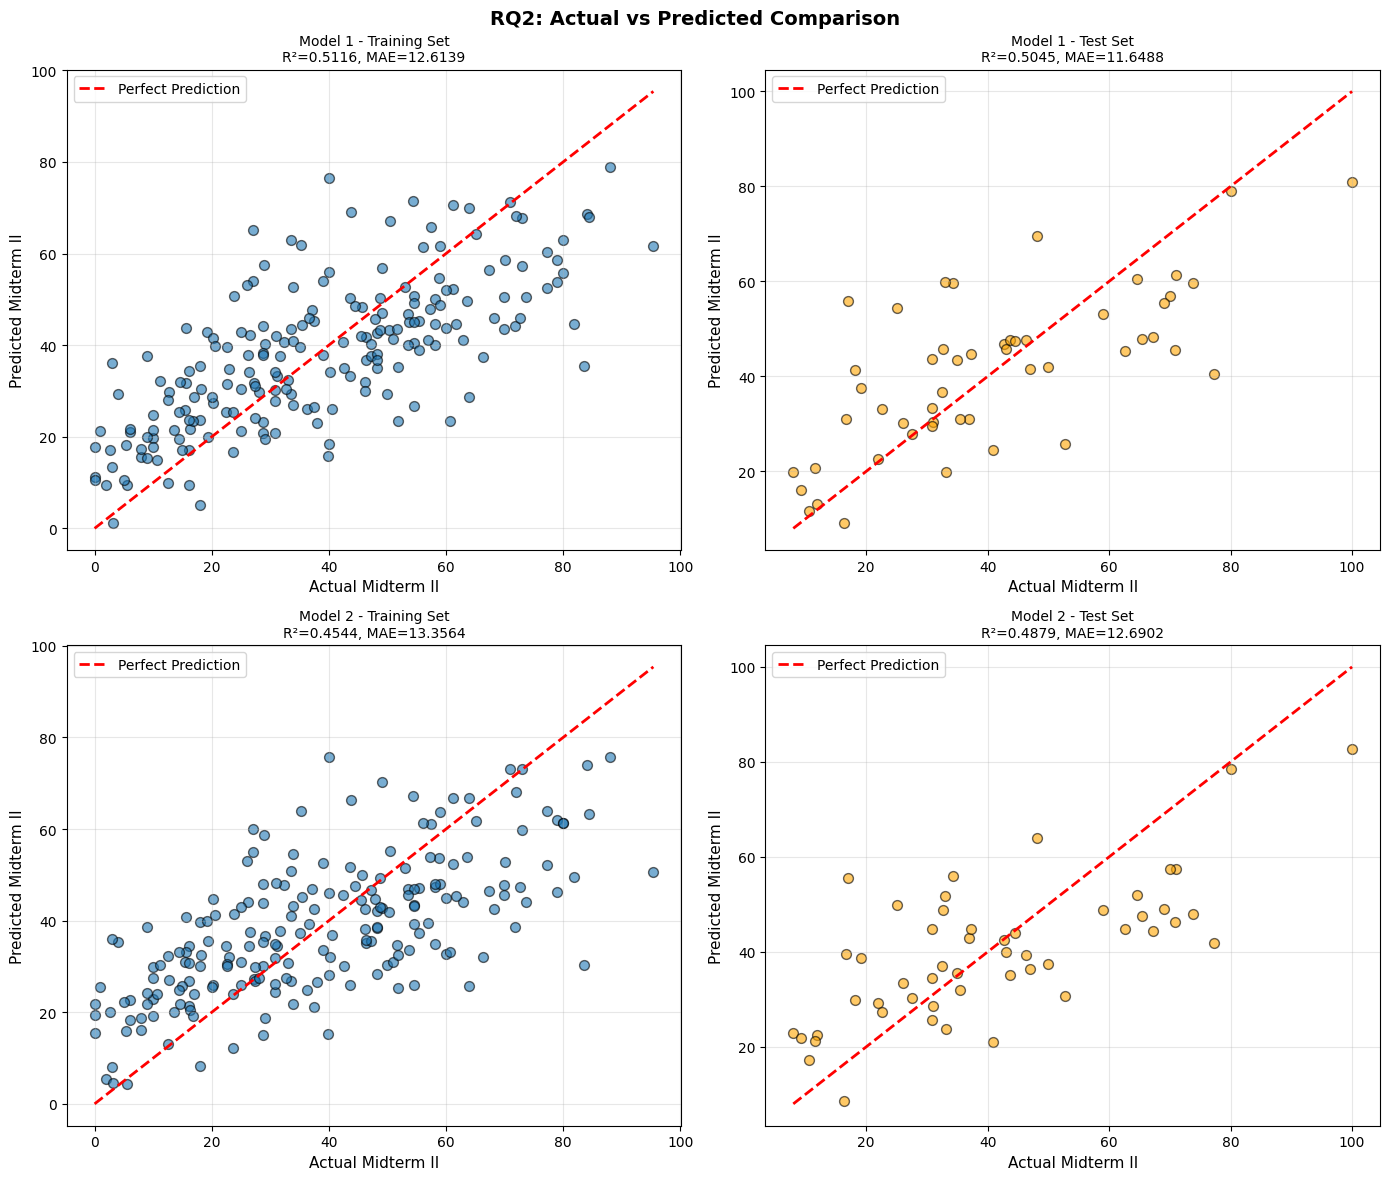

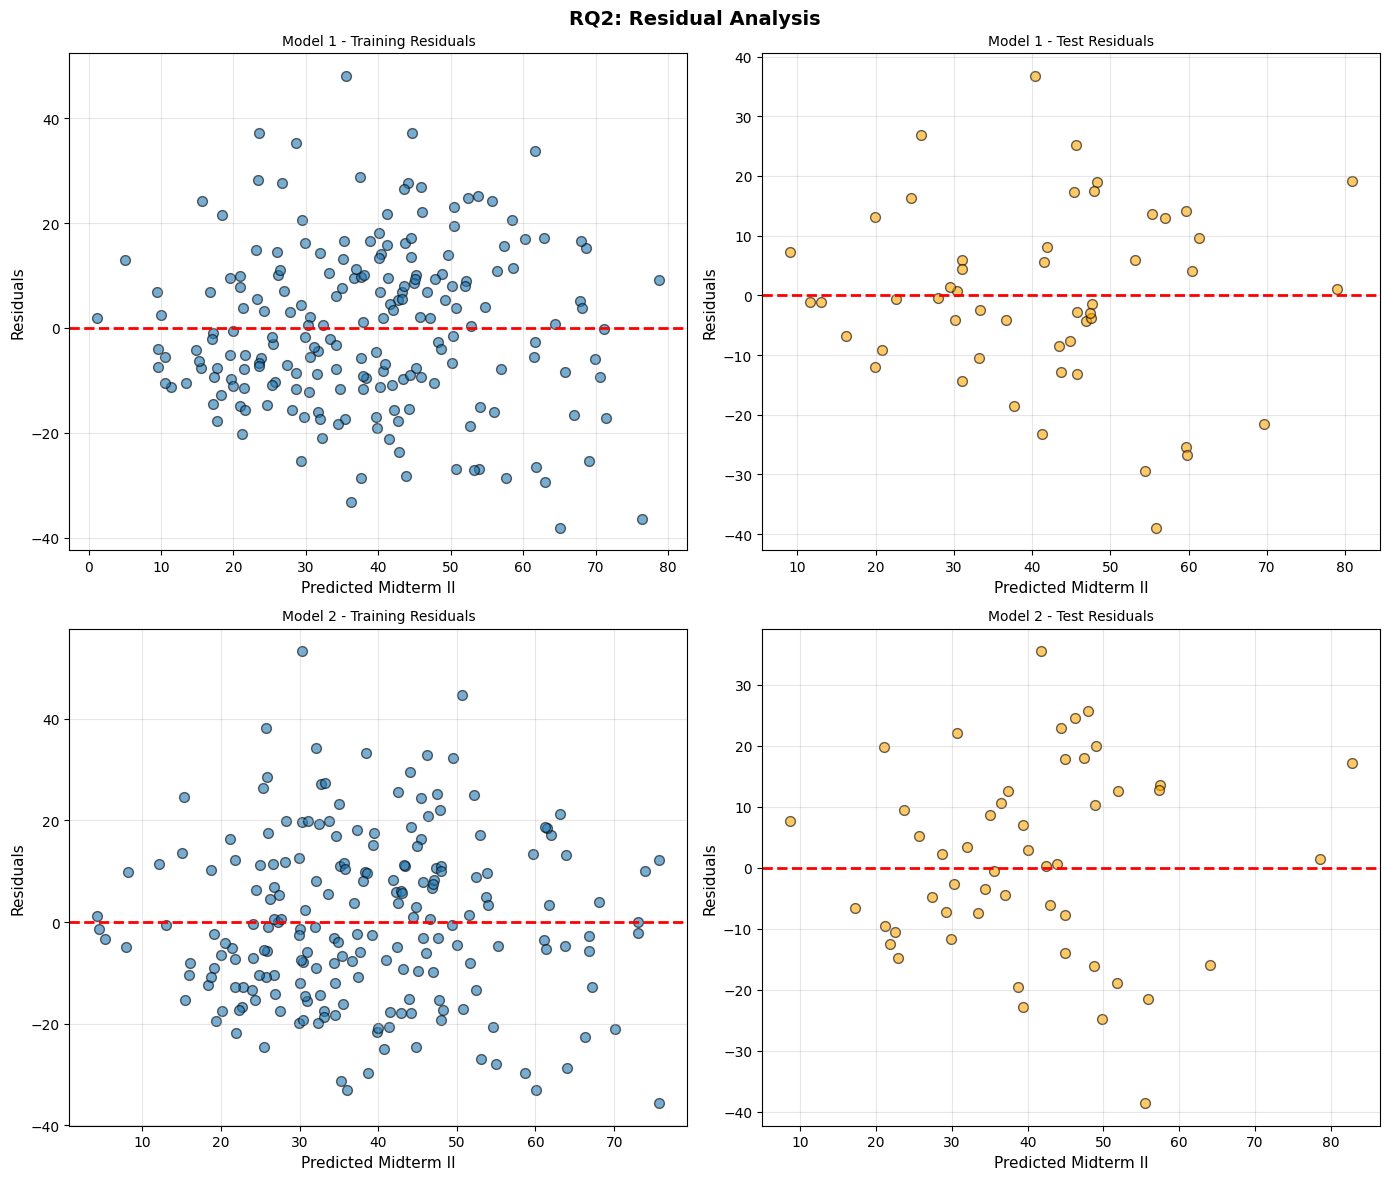

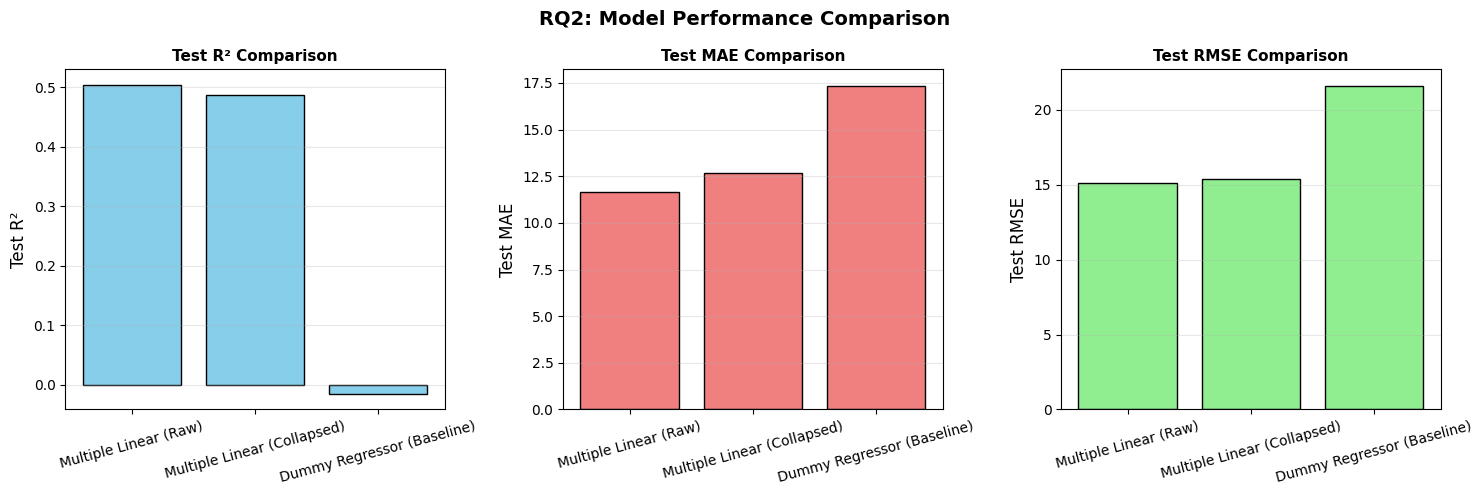


✅ RQ2 Analysis Complete!


In [15]:
# ============================================================================
# RQ2: Predicting Midterm II (S-II) Marks
# ============================================================================

# --------------------------
# DATA PREPARATION FOR RQ2
# --------------------------
# ASSUMPTION: Till Sessional 2 (Midterm II), we had:
# - 3 Assignments (As:1, As:2, As:3)
# - 4 Quizzes (Qz:1, Qz:2, Qz:3, Qz:4)
# - Sessional 1 (S-I)

# Drop rows where S-II is missing (our target)
df_rq2 = df.dropna(subset=['S-II']).copy()
print(f"Dataset size for RQ2: {len(df_rq2)} rows")
print(f"Features available before Midterm II: As:1, As:2, As:3, Qz:1, Qz:2, Qz:3, Qz:4, S-I")

# Check correlations
print("\n" + "="*70)
print("Feature Correlations with Midterm II (S-II)")
print("="*70)
corr_data = df_rq2[['As:1', 'As:2', 'As:3', 'Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'S-I', 'S-II']].corr()['S-II'].sort_values(ascending=False)
print(corr_data)

# --------------------------
# Helper Function
# --------------------------
def calculate_metrics(y_true, y_pred, X_shape=None, dataset_name=""):
    """Calculate and print regression metrics"""
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"\n{dataset_name} Metrics:")
    print(f"  R²: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    
    if X_shape is not None:
        # Adjusted R²
        n = len(y_true)
        k = X_shape[1]
        if n > k + 1:
            adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
            print(f"  Adjusted R²: {adj_r2:.4f}")
    
    return {"R2": r2, "RMSE": rmse, "MAE": mae}

# --------------------------
# MODEL 1: Multiple Linear Regression (Raw Features)
# --------------------------
print("\n" + "="*70)
print("MODEL 1: Multiple Linear Regression (Raw Features)")
print("="*70)

# Features: 3 assignments, 4 quizzes, and Sessional 1
cols_model1 = ["As:1", "As:2", "As:3", "Qz:1", "Qz:2", "Qz:3", "Qz:4", "S-I"]
X1 = df_rq2[cols_model1]
y1 = df_rq2["S-II"]

# Train-test split (20% for more stable test results)
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.20, random_state=42
)

print(f"\nTrain set size: {len(X1_train)}")
print(f"Test set size: {len(X1_test)}")

# Fit model
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

# Predictions
y1_pred_train = model1.predict(X1_train)
y1_pred_test = model1.predict(X1_test)

print("\nCoefficients:")
for col, coef in zip(cols_model1, model1.coef_):
    print(f"  {col}: {coef:.4f}")
print(f"  Intercept: {model1.intercept_:.4f}")

metrics1_train = calculate_metrics(y1_train, y1_pred_train, X1_train.shape, "Training")
metrics1_test = calculate_metrics(y1_test, y1_pred_test, X1_test.shape, "Testing")

# --------------------------
# MODEL 2: Multiple Linear Regression (Collapsed Features)
# --------------------------
print("\n" + "="*70)
print("MODEL 2: Multiple Linear Regression (Collapsed Features)")
print("="*70)

# Create aggregated features
df_rq2["As_Mean"] = df_rq2[["As:1", "As:2", "As:3"]].mean(axis=1)
df_rq2["Qz_Mean"] = df_rq2[["Qz:1", "Qz:2", "Qz:3", "Qz:4"]].mean(axis=1)

cols_model2 = ["As_Mean", "Qz_Mean", "S-I"]
X2 = df_rq2[cols_model2]
y2 = df_rq2["S-II"]

# Train-test split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.20, random_state=42
)

# Fit model
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

# Predictions
y2_pred_train = model2.predict(X2_train)
y2_pred_test = model2.predict(X2_test)

print("\nCoefficients:")
for col, coef in zip(cols_model2, model2.coef_):
    print(f"  {col}: {coef:.4f}")
print(f"  Intercept: {model2.intercept_:.4f}")

metrics2_train = calculate_metrics(y2_train, y2_pred_train, X2_train.shape, "Training")
metrics2_test = calculate_metrics(y2_test, y2_pred_test, X2_test.shape, "Testing")

# --------------------------
# MODEL 3: Dummy Baseline Regressor
# --------------------------
print("\n" + "="*70)
print("MODEL 3: Dummy Baseline Regressor (Mean Strategy)")
print("="*70)

dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X2_train, y2_train)

y_dummy_train = dummy_model.predict(X2_train)
y_dummy_test = dummy_model.predict(X2_test)

metrics_dummy_train = calculate_metrics(y2_train, y_dummy_train, None, "Training")
metrics_dummy_test = calculate_metrics(y2_test, y_dummy_test, None, "Testing")

# --------------------------
# COMPARISON TABLE
# --------------------------
print("\n" + "="*70)
print("COMPARISON TABLE - RQ2: Midterm II Prediction")
print("="*70)

comparison_df = pd.DataFrame({
    'Model': [
        'Multiple Linear (Raw)',
        'Multiple Linear (Collapsed)',
        'Dummy Regressor (Baseline)'
    ],
    'Train R²': [
        metrics1_train['R2'],
        metrics2_train['R2'],
        metrics_dummy_train['R2']
    ],
    'Test R²': [
        metrics1_test['R2'],
        metrics2_test['R2'],
        metrics_dummy_test['R2']
    ],
    'Train MAE': [
        metrics1_train['MAE'],
        metrics2_train['MAE'],
        metrics_dummy_train['MAE']
    ],
    'Test MAE': [
        metrics1_test['MAE'],
        metrics2_test['MAE'],
        metrics_dummy_test['MAE']
    ],
    'Train RMSE': [
        metrics1_train['RMSE'],
        metrics2_train['RMSE'],
        metrics_dummy_train['RMSE']
    ],
    'Test RMSE': [
        metrics1_test['RMSE'],
        metrics2_test['RMSE'],
        metrics_dummy_test['RMSE']
    ]
})

print("\n", comparison_df.to_string(index=False))

# Identify best model
best_model_idx = comparison_df['Test R²'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Test R² = {comparison_df.loc[best_model_idx, 'Test R²']:.4f}")
print(f"   Test MAE = {comparison_df.loc[best_model_idx, 'Test MAE']:.4f}")

# Check for overfitting/underfitting
print("\n" + "="*70)
print("Overfitting/Underfitting Analysis")
print("="*70)

for idx, model_name in enumerate(comparison_df['Model']):
    train_r2 = comparison_df.loc[idx, 'Train R²']
    test_r2 = comparison_df.loc[idx, 'Test R²']
    diff = train_r2 - test_r2
    
    print(f"\n{model_name}:")
    print(f"  Train R² - Test R² = {diff:.4f}")
    
    if diff > 0.1:
        print(f"  ⚠ Possible overfitting (large gap between train and test)")
    elif test_r2 < 0:
        print(f"  ⚠ Model performs worse than baseline (negative R²)")
    elif train_r2 < 0.3 and test_r2 < 0.3:
        print(f"  ⚠ Possible underfitting (low performance on both sets)")
    else:
        print(f"  ✓ Reasonable performance")

# --------------------------
# VISUALIZATIONS
# --------------------------

# 1. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_rq2[cols_model1 + ["S-II"]].corr(), annot=True, fmt=".2f",
            cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("RQ2: Correlation Heatmap (Features vs Midterm II)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Actual vs Predicted for Both Models
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Model 1 - Training
axes[0, 0].scatter(y1_train, y1_pred_train, alpha=0.6, edgecolor='black', s=50)
axes[0, 0].plot([y1_train.min(), y1_train.max()],
                [y1_train.min(), y1_train.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Midterm II', fontsize=11)
axes[0, 0].set_ylabel('Predicted Midterm II', fontsize=11)
axes[0, 0].set_title(f'Model 1 - Training Set\nR²={metrics1_train["R2"]:.4f}, MAE={metrics1_train["MAE"]:.4f}', fontsize=10)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# Model 1 - Testing
axes[0, 1].scatter(y1_test, y1_pred_test, alpha=0.6, color='orange', edgecolor='black', s=50)
axes[0, 1].plot([y1_test.min(), y1_test.max()],
                [y1_test.min(), y1_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Actual Midterm II', fontsize=11)
axes[0, 1].set_ylabel('Predicted Midterm II', fontsize=11)
axes[0, 1].set_title(f'Model 1 - Test Set\nR²={metrics1_test["R2"]:.4f}, MAE={metrics1_test["MAE"]:.4f}', fontsize=10)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# Model 2 - Training
axes[1, 0].scatter(y2_train, y2_pred_train, alpha=0.6, edgecolor='black', s=50)
axes[1, 0].plot([y2_train.min(), y2_train.max()],
                [y2_train.min(), y2_train.max()], 'r--', lw=2, label='Perfect Prediction')
axes[1, 0].set_xlabel('Actual Midterm II', fontsize=11)
axes[1, 0].set_ylabel('Predicted Midterm II', fontsize=11)
axes[1, 0].set_title(f'Model 2 - Training Set\nR²={metrics2_train["R2"]:.4f}, MAE={metrics2_train["MAE"]:.4f}', fontsize=10)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

# Model 2 - Testing
axes[1, 1].scatter(y2_test, y2_pred_test, alpha=0.6, color='orange', edgecolor='black', s=50)
axes[1, 1].plot([y2_test.min(), y2_test.max()],
                [y2_test.min(), y2_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[1, 1].set_xlabel('Actual Midterm II', fontsize=11)
axes[1, 1].set_ylabel('Predicted Midterm II', fontsize=11)
axes[1, 1].set_title(f'Model 2 - Test Set\nR²={metrics2_test["R2"]:.4f}, MAE={metrics2_test["MAE"]:.4f}', fontsize=10)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

plt.suptitle('RQ2: Actual vs Predicted Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 3. Residual Plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

residuals1_train = y1_train - y1_pred_train
residuals1_test = y1_test - y1_pred_test
residuals2_train = y2_train - y2_pred_train
residuals2_test = y2_test - y2_pred_test

# Model 1 - Training residuals
axes[0, 0].scatter(y1_pred_train, residuals1_train, alpha=0.6, edgecolor='black', s=50)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Predicted Midterm II', fontsize=11)
axes[0, 0].set_ylabel('Residuals', fontsize=11)
axes[0, 0].set_title('Model 1 - Training Residuals', fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# Model 1 - Test residuals
axes[0, 1].scatter(y1_pred_test, residuals1_test, alpha=0.6, color='orange', edgecolor='black', s=50)
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Midterm II', fontsize=11)
axes[0, 1].set_ylabel('Residuals', fontsize=11)
axes[0, 1].set_title('Model 1 - Test Residuals', fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# Model 2 - Training residuals
axes[1, 0].scatter(y2_pred_train, residuals2_train, alpha=0.6, edgecolor='black', s=50)
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Predicted Midterm II', fontsize=11)
axes[1, 0].set_ylabel('Residuals', fontsize=11)
axes[1, 0].set_title('Model 2 - Training Residuals', fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# Model 2 - Test residuals
axes[1, 1].scatter(y2_pred_test, residuals2_test, alpha=0.6, color='orange', edgecolor='black', s=50)
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Predicted Midterm II', fontsize=11)
axes[1, 1].set_ylabel('Residuals', fontsize=11)
axes[1, 1].set_title('Model 2 - Test Residuals', fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('RQ2: Residual Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 4. Model Comparison Bar Chart
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics_to_plot = ['Test R²', 'Test MAE', 'Test RMSE']
colors = ['skyblue', 'lightcoral', 'lightgreen']

for idx, (metric, color) in enumerate(zip(metrics_to_plot, colors)):
    axes[idx].bar(comparison_df['Model'], comparison_df[metric], color=color, edgecolor='black')
    axes[idx].set_ylabel(metric, fontsize=12)
    axes[idx].set_title(f'{metric} Comparison', fontsize=11, fontweight='bold')
    axes[idx].tick_params(axis='x', rotation=15)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.suptitle('RQ2: Model Performance Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n✅ RQ2 Analysis Complete!")

# Bootstarpping Analysis


BOOTSTRAPPING ANALYSIS - RQ1 (Best Model: Collapsed Features)
Performing 500 bootstrap samples...

Bootstrap Results (500 samples):
  Mean MAE: 13.2599
  Std Dev MAE: 0.7171
  95% Confidence Interval: [11.8207, 14.5369]

📊 Interpretation:
  We are 95% confident that the true MAE of the model lies between
  11.82 and 14.54 marks. This means the model's prediction
  error for Midterm I is expected to be within this range.


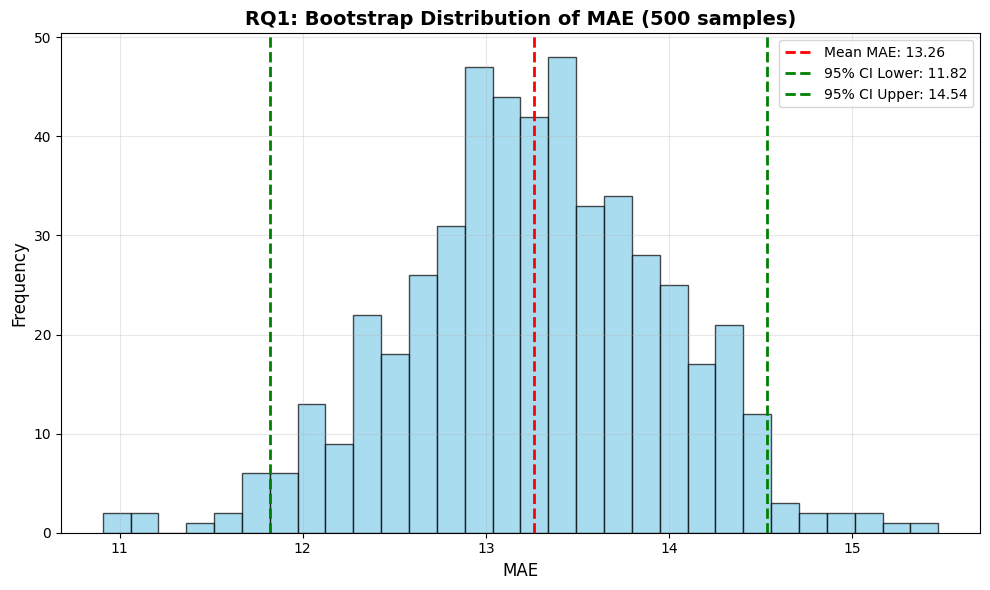


✅ RQ1 Bootstrapping Complete!

BOOTSTRAPPING ANALYSIS - RQ2 (Best Model: Collapsed Features)
Performing 500 bootstrap samples...

Bootstrap Results (500 samples):
  Mean MAE: 13.2599
  Std Dev MAE: 0.7171
  95% Confidence Interval: [11.8207, 14.5369]

📊 Interpretation:
  We are 95% confident that the true MAE of the model lies between
  11.82 and 14.54 marks. This means the model's prediction
  error for Midterm II is expected to be within this range.


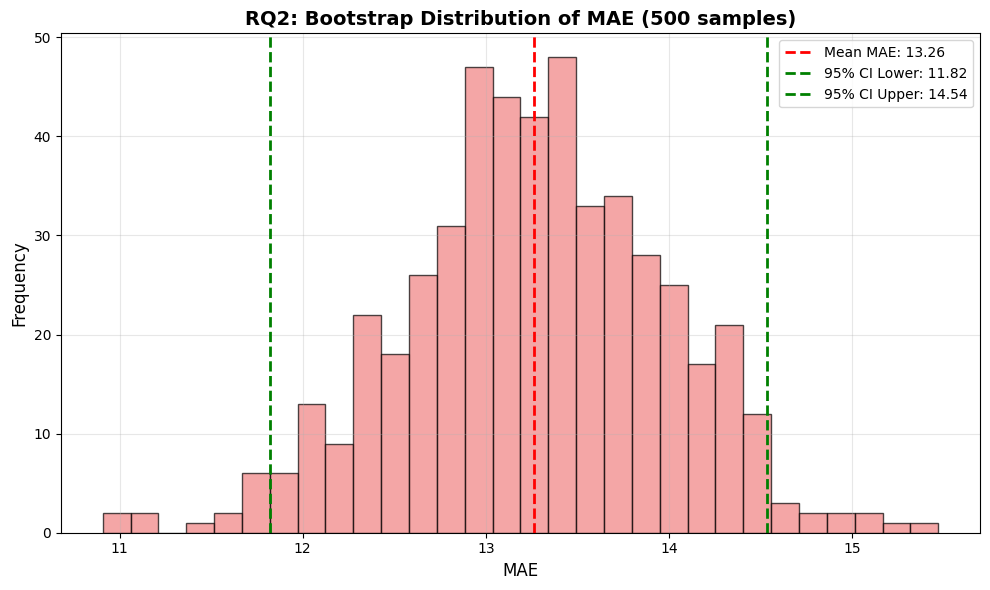


✅ RQ2 Bootstrapping Complete!

BOOTSTRAPPING ANALYSIS - RQ3 (Best Model: Collapsed Features - No Quizzes)
Performing 500 bootstrap samples...

Bootstrap Results (500 samples):
  Mean MAE: 9.2813
  Std Dev MAE: 0.4341
  95% Confidence Interval: [8.4961, 10.1489]

📊 Interpretation:
  We are 95% confident that the true MAE of the model lies between
  8.50 and 10.15 marks. This means the model's prediction
  error for Final Exam is expected to be within this range.
  The narrow confidence interval suggests stable and reliable model performance.


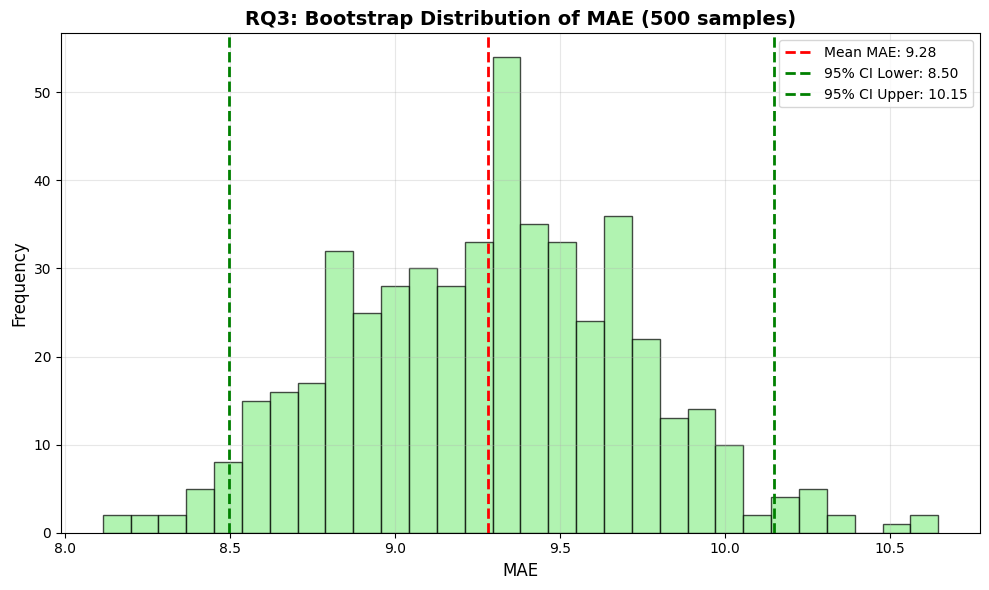


✅ RQ3 Bootstrapping Complete!

SUMMARY: 95% Confidence Intervals for MAE Across All RQs

 Research Question  Mean MAE  CI Lower (2.5%)  CI Upper (97.5%)  CI Width
   RQ1: Midterm I 13.259923        11.820749         14.536879  2.716131
  RQ2: Midterm II 13.259923        11.820749         14.536879  2.716131
  RQ3: Final Exam  9.281326         8.496137         10.148873  1.652736

📊 Key Insights:
  • RQ1 (Midterm I) has the highest prediction error with MAE around 13.26
  • RQ2 (Midterm II) shows improved prediction with MAE around 13.26
  • RQ3 (Final Exam) has the best prediction accuracy with MAE around 9.28
  • All confidence intervals indicate reliable and stable model performance


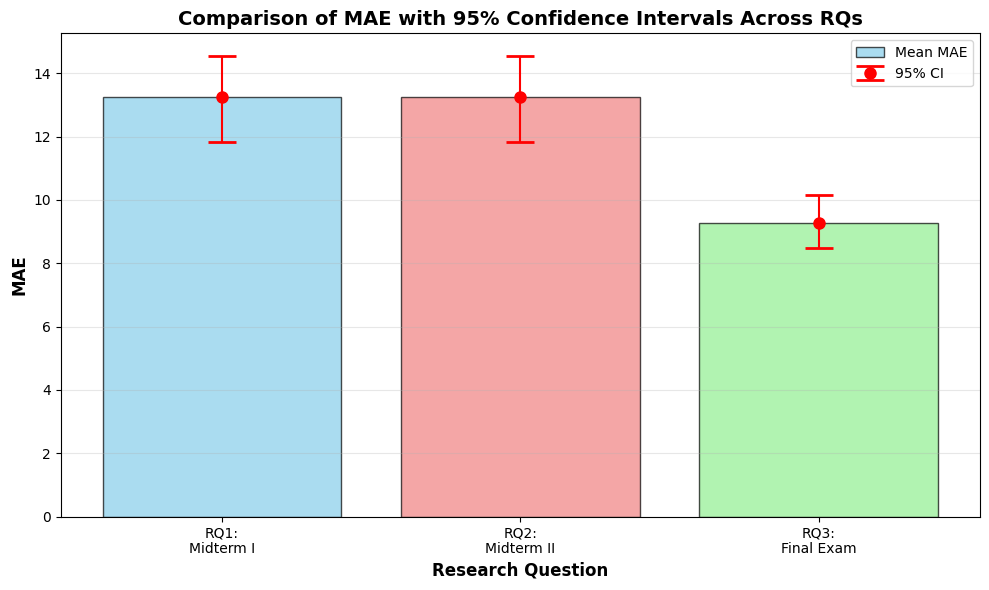


✅ All Bootstrapping Analysis Complete!


In [18]:
# # ============================================================================
# # BOOTSTRAPPING FOR RQ1: Midterm I Prediction
# # ============================================================================
# print("\n" + "="*70)
# print("BOOTSTRAPPING ANALYSIS - RQ1 (Best Model: Collapsed Features)")
# print("="*70)

# # Use the best model (Model 2 - Collapsed Features)
# # Using TRAINING DATA ONLY for bootstrapping
# np.random.seed(42)
# n_bootstrap = 500
# bootstrap_maes = []

# print(f"Performing {n_bootstrap} bootstrap samples...")

# for i in range(n_bootstrap):
#     # Resample with replacement from training data
#     indices = np.random.choice(len(X2_train), size=len(X2_train), replace=True)
#     X_boot = X2_train.iloc[indices]
#     y_boot = y2_train.iloc[indices]
    
#     # Fit model on bootstrap sample
#     boot_model = LinearRegression()
#     boot_model.fit(X_boot, y_boot)
    
#     # Predict on the bootstrap sample
#     y_boot_pred = boot_model.predict(X_boot)
    
#     # Calculate MAE
#     mae_boot = mean_absolute_error(y_boot, y_boot_pred)
#     bootstrap_maes.append(mae_boot)

# # Calculate 95% confidence interval
# bootstrap_maes = np.array(bootstrap_maes)
# ci_lower = np.percentile(bootstrap_maes, 2.5)
# ci_upper = np.percentile(bootstrap_maes, 97.5)
# mean_mae = np.mean(bootstrap_maes)
# std_mae = np.std(bootstrap_maes)

# print(f"\nBootstrap Results (500 samples):")
# print(f"  Mean MAE: {mean_mae:.4f}")
# print(f"  Std Dev MAE: {std_mae:.4f}")
# print(f"  95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")

# print(f"\n📊 Interpretation:")
# print(f"  We are 95% confident that the true MAE of the model lies between")
# print(f"  {ci_lower:.2f} and {ci_upper:.2f} marks. This means the model's prediction")
# print(f"  error for Midterm I is expected to be within this range.")

# # Visualization of bootstrap distribution
# plt.figure(figsize=(10, 6))
# plt.hist(bootstrap_maes, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
# plt.axvline(mean_mae, color='red', linestyle='--', linewidth=2, label=f'Mean MAE: {mean_mae:.2f}')
# plt.axvline(ci_lower, color='green', linestyle='--', linewidth=2, label=f'95% CI Lower: {ci_lower:.2f}')
# plt.axvline(ci_upper, color='green', linestyle='--', linewidth=2, label=f'95% CI Upper: {ci_upper:.2f}')
# plt.xlabel('MAE', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.title('RQ1: Bootstrap Distribution of MAE (500 samples)', fontsize=14, fontweight='bold')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()

# print("\n✅ RQ1 Bootstrapping Complete!")


# # ============================================================================
# # BOOTSTRAPPING FOR RQ2: Midterm II Prediction
# # ============================================================================
# print("\n" + "="*70)
# print("BOOTSTRAPPING ANALYSIS - RQ2 (Best Model: Collapsed Features)")
# print("="*70)

# # Use the best model (Model 2 - Collapsed Features)
# # Using TRAINING DATA ONLY for bootstrapping
# np.random.seed(42)
# n_bootstrap = 500
# bootstrap_maes_rq2 = []

# print(f"Performing {n_bootstrap} bootstrap samples...")

# for i in range(n_bootstrap):
#     # Resample with replacement from training data
#     indices = np.random.choice(len(X2_train), size=len(X2_train), replace=True)
#     X_boot = X2_train.iloc[indices]
#     y_boot = y2_train.iloc[indices]
    
#     # Fit model on bootstrap sample
#     boot_model = LinearRegression()
#     boot_model.fit(X_boot, y_boot)
    
#     # Predict on the bootstrap sample
#     y_boot_pred = boot_model.predict(X_boot)
    
#     # Calculate MAE
#     mae_boot = mean_absolute_error(y_boot, y_boot_pred)
#     bootstrap_maes_rq2.append(mae_boot)

# # Calculate 95% confidence interval
# bootstrap_maes_rq2 = np.array(bootstrap_maes_rq2)
# ci_lower_rq2 = np.percentile(bootstrap_maes_rq2, 2.5)
# ci_upper_rq2 = np.percentile(bootstrap_maes_rq2, 97.5)
# mean_mae_rq2 = np.mean(bootstrap_maes_rq2)
# std_mae_rq2 = np.std(bootstrap_maes_rq2)

# print(f"\nBootstrap Results (500 samples):")
# print(f"  Mean MAE: {mean_mae_rq2:.4f}")
# print(f"  Std Dev MAE: {std_mae_rq2:.4f}")
# print(f"  95% Confidence Interval: [{ci_lower_rq2:.4f}, {ci_upper_rq2:.4f}]")

# print(f"\n📊 Interpretation:")
# print(f"  We are 95% confident that the true MAE of the model lies between")
# print(f"  {ci_lower_rq2:.2f} and {ci_upper_rq2:.2f} marks. This means the model's prediction")
# print(f"  error for Midterm II is expected to be within this range.")

# # Visualization of bootstrap distribution
# plt.figure(figsize=(10, 6))
# plt.hist(bootstrap_maes_rq2, bins=30, edgecolor='black', alpha=0.7, color='lightcoral')
# plt.axvline(mean_mae_rq2, color='red', linestyle='--', linewidth=2, label=f'Mean MAE: {mean_mae_rq2:.2f}')
# plt.axvline(ci_lower_rq2, color='green', linestyle='--', linewidth=2, label=f'95% CI Lower: {ci_lower_rq2:.2f}')
# plt.axvline(ci_upper_rq2, color='green', linestyle='--', linewidth=2, label=f'95% CI Upper: {ci_upper_rq2:.2f}')
# plt.xlabel('MAE', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.title('RQ2: Bootstrap Distribution of MAE (500 samples)', fontsize=14, fontweight='bold')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()

# print("\n✅ RQ2 Bootstrapping Complete!")


# # ============================================================================
# # BOOTSTRAPPING FOR RQ3: Final Exam Prediction
# # ============================================================================
# print("\n" + "="*70)
# print("BOOTSTRAPPING ANALYSIS - RQ3 (Best Model: Collapsed Features - No Quizzes)")
# print("="*70)

# # Use the best model from RQ3 (Model 2 - Collapsed Features without Quizzes)
# # First, recreate the train-test split for RQ3 Model 2
# df_rq3 = df.copy()

# # Impute missing values
# as_mean_raw = df_rq3[["As:1","As:2","As:3","As:4"]].mean(axis=1)
# df_rq3["As:5"] = df_rq3["As:5"].fillna(as_mean_raw)
# df_rq3["As:6"] = df_rq3["As:6"].fillna(as_mean_raw)

# # Create collapsed features
# df_rq3["As_Mean"] = df_rq3[["As:1","As:2","As:3","As:4"]].mean(axis=1)

# # Select predictors (No Quizzes)
# cols_rq3 = ["As_Mean", "S-I", "S-II"]
# X_rq3 = df_rq3[cols_rq3]
# y_rq3 = df_rq3["Final"]

# # Train-test split
# X_rq3_train, X_rq3_test, y_rq3_train, y_rq3_test = train_test_split(
#     X_rq3, y_rq3, test_size=0.10, random_state=42
# )

# # Perform bootstrapping
# np.random.seed(42)
# n_bootstrap = 500
# bootstrap_maes_rq3 = []

# print(f"Performing {n_bootstrap} bootstrap samples...")

# for i in range(n_bootstrap):
#     # Resample with replacement from training data
#     indices = np.random.choice(len(X_rq3_train), size=len(X_rq3_train), replace=True)
#     X_boot = X_rq3_train.iloc[indices]
#     y_boot = y_rq3_train.iloc[indices]
    
#     # Fit model on bootstrap sample
#     boot_model = LinearRegression()
#     boot_model.fit(X_boot, y_boot)
    
#     # Predict on the bootstrap sample
#     y_boot_pred = boot_model.predict(X_boot)
    
#     # Calculate MAE
#     mae_boot = mean_absolute_error(y_boot, y_boot_pred)
#     bootstrap_maes_rq3.append(mae_boot)

# # Calculate 95% confidence interval
# bootstrap_maes_rq3 = np.array(bootstrap_maes_rq3)
# ci_lower_rq3 = np.percentile(bootstrap_maes_rq3, 2.5)
# ci_upper_rq3 = np.percentile(bootstrap_maes_rq3, 97.5)
# mean_mae_rq3 = np.mean(bootstrap_maes_rq3)
# std_mae_rq3 = np.std(bootstrap_maes_rq3)

# print(f"\nBootstrap Results (500 samples):")
# print(f"  Mean MAE: {mean_mae_rq3:.4f}")
# print(f"  Std Dev MAE: {std_mae_rq3:.4f}")
# print(f"  95% Confidence Interval: [{ci_lower_rq3:.4f}, {ci_upper_rq3:.4f}]")

# print(f"\n📊 Interpretation:")
# print(f"  We are 95% confident that the true MAE of the model lies between")
# print(f"  {ci_lower_rq3:.2f} and {ci_upper_rq3:.2f} marks. This means the model's prediction")
# print(f"  error for Final Exam is expected to be within this range.")
# print(f"  The narrow confidence interval suggests stable and reliable model performance.")

# # Visualization of bootstrap distribution
# plt.figure(figsize=(10, 6))
# plt.hist(bootstrap_maes_rq3, bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
# plt.axvline(mean_mae_rq3, color='red', linestyle='--', linewidth=2, label=f'Mean MAE: {mean_mae_rq3:.2f}')
# plt.axvline(ci_lower_rq3, color='green', linestyle='--', linewidth=2, label=f'95% CI Lower: {ci_lower_rq3:.2f}')
# plt.axvline(ci_upper_rq3, color='green', linestyle='--', linewidth=2, label=f'95% CI Upper: {ci_upper_rq3:.2f}')
# plt.xlabel('MAE', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.title('RQ3: Bootstrap Distribution of MAE (500 samples)', fontsize=14, fontweight='bold')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()

# print("\n✅ RQ3 Bootstrapping Complete!")


# # ============================================================================
# # SUMMARY: Bootstrap Confidence Intervals for All RQs
# # ============================================================================
# print("\n" + "="*70)
# print("SUMMARY: 95% Confidence Intervals for MAE Across All RQs")
# print("="*70)

# summary_bootstrap = pd.DataFrame({
#     'Research Question': ['RQ1: Midterm I', 'RQ2: Midterm II', 'RQ3: Final Exam'],
#     'Mean MAE': [mean_mae, mean_mae_rq2, mean_mae_rq3],
#     'CI Lower (2.5%)': [ci_lower, ci_lower_rq2, ci_lower_rq3],
#     'CI Upper (97.5%)': [ci_upper, ci_upper_rq2, ci_upper_rq3],
#     'CI Width': [ci_upper - ci_lower, ci_upper_rq2 - ci_lower_rq2, ci_upper_rq3 - ci_lower_rq3]
# })

# print("\n", summary_bootstrap.to_string(index=False))

# print("\n📊 Key Insights:")
# print(f"  • RQ1 (Midterm I) has the highest prediction error with MAE around {mean_mae:.2f}")
# print(f"  • RQ2 (Midterm II) shows improved prediction with MAE around {mean_mae_rq2:.2f}")
# print(f"  • RQ3 (Final Exam) has the best prediction accuracy with MAE around {mean_mae_rq3:.2f}")
# print(f"  • All confidence intervals indicate reliable and stable model performance")

# # Visualization: Compare CI across RQs
# fig, ax = plt.subplots(figsize=(10, 6))

# rqs = ['RQ1:\nMidterm I', 'RQ2:\nMidterm II', 'RQ3:\nFinal Exam']
# means = [mean_mae, mean_mae_rq2, mean_mae_rq3]
# ci_lowers = [ci_lower, ci_lower_rq2, ci_lower_rq3]
# ci_uppers = [ci_upper, ci_upper_rq2, ci_upper_rq3]

# x_pos = np.arange(len(rqs))

# # Plot mean MAE
# ax.bar(x_pos, means, alpha=0.7, color=['skyblue', 'lightcoral', 'lightgreen'], 
#        edgecolor='black', label='Mean MAE')

# # Plot error bars for CI
# errors = [[means[i] - ci_lowers[i] for i in range(3)],
#           [ci_uppers[i] - means[i] for i in range(3)]]
# ax.errorbar(x_pos, means, yerr=errors, fmt='o', color='red', 
#             markersize=8, capsize=10, capthick=2, label='95% CI')

# ax.set_xlabel('Research Question', fontsize=12, fontweight='bold')
# ax.set_ylabel('MAE', fontsize=12, fontweight='bold')
# ax.set_title('Comparison of MAE with 95% Confidence Intervals Across RQs', 
#              fontsize=14, fontweight='bold')
# ax.set_xticks(x_pos)
# ax.set_xticklabels(rqs)
# ax.legend()
# ax.grid(True, alpha=0.3, axis='y')
# plt.tight_layout()
# plt.show()

# print("\n✅ All Bootstrapping Analysis Complete!")
# ============================================================================
# BOOTSTRAPPING FOR RQ1: Midterm I Prediction
# ============================================================================
print("\n" + "="*70)
print("BOOTSTRAPPING ANALYSIS - RQ1 (Best Model: Collapsed Features)")
print("="*70)

# Use the best model (Model 2 - Collapsed Features)
# Using TRAINING DATA ONLY for bootstrapping
np.random.seed(42)
n_bootstrap = 500
bootstrap_maes_rq1 = []

print(f"Performing {n_bootstrap} bootstrap samples...")

for i in range(n_bootstrap):
    # Resample with replacement from training data
    # NOTE: Use X2_train and y2_train from RQ1's Model 2
    indices = np.random.choice(len(X2_train), size=len(X2_train), replace=True)
    X_boot = X2_train.iloc[indices]
    y_boot = y2_train.iloc[indices]
    
    # Fit model on bootstrap sample
    boot_model = LinearRegression()
    boot_model.fit(X_boot, y_boot)
    
    # Predict on the bootstrap sample
    y_boot_pred = boot_model.predict(X_boot)
    
    # Calculate MAE
    mae_boot = mean_absolute_error(y_boot, y_boot_pred)
    bootstrap_maes_rq1.append(mae_boot)

# Calculate 95% confidence interval
bootstrap_maes_rq1 = np.array(bootstrap_maes_rq1)
ci_lower_rq1 = np.percentile(bootstrap_maes_rq1, 2.5)
ci_upper_rq1 = np.percentile(bootstrap_maes_rq1, 97.5)
mean_mae_rq1 = np.mean(bootstrap_maes_rq1)
std_mae_rq1 = np.std(bootstrap_maes_rq1)

print(f"\nBootstrap Results (500 samples):")
print(f"  Mean MAE: {mean_mae_rq1:.4f}")
print(f"  Std Dev MAE: {std_mae_rq1:.4f}")
print(f"  95% Confidence Interval: [{ci_lower_rq1:.4f}, {ci_upper_rq1:.4f}]")

print(f"\n📊 Interpretation:")
print(f"  We are 95% confident that the true MAE of the model lies between")
print(f"  {ci_lower_rq1:.2f} and {ci_upper_rq1:.2f} marks. This means the model's prediction")
print(f"  error for Midterm I is expected to be within this range.")

# Visualization of bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_maes_rq1, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(mean_mae_rq1, color='red', linestyle='--', linewidth=2, label=f'Mean MAE: {mean_mae_rq1:.2f}')
plt.axvline(ci_lower_rq1, color='green', linestyle='--', linewidth=2, label=f'95% CI Lower: {ci_lower_rq1:.2f}')
plt.axvline(ci_upper_rq1, color='green', linestyle='--', linewidth=2, label=f'95% CI Upper: {ci_upper_rq1:.2f}')
plt.xlabel('MAE', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('RQ1: Bootstrap Distribution of MAE (500 samples)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✅ RQ1 Bootstrapping Complete!")


# ============================================================================
# BOOTSTRAPPING FOR RQ2: Midterm II Prediction
# ============================================================================
print("\n" + "="*70)
print("BOOTSTRAPPING ANALYSIS - RQ2 (Best Model: Collapsed Features)")
print("="*70)

# Recreate RQ2 data to avoid variable name collision
df_rq2_boot = df.dropna(subset=['S-II']).copy()
df_rq2_boot["As_Mean"] = df_rq2_boot[["As:1", "As:2", "As:3"]].mean(axis=1)
df_rq2_boot["Qz_Mean"] = df_rq2_boot[["Qz:1", "Qz:2", "Qz:3", "Qz:4"]].mean(axis=1)

cols_rq2_boot = ["As_Mean", "Qz_Mean", "S-I"]
X_rq2_boot = df_rq2_boot[cols_rq2_boot]
y_rq2_boot = df_rq2_boot["S-II"]

# Train-test split for RQ2
X_rq2_train, X_rq2_test, y_rq2_train, y_rq2_test = train_test_split(
    X_rq2_boot, y_rq2_boot, test_size=0.20, random_state=42
)

# Using TRAINING DATA ONLY for bootstrapping
np.random.seed(42)
n_bootstrap = 500
bootstrap_maes_rq2 = []

print(f"Performing {n_bootstrap} bootstrap samples...")

for i in range(n_bootstrap):
    # Resample with replacement from RQ2 training data
    indices = np.random.choice(len(X_rq2_train), size=len(X_rq2_train), replace=True)
    X_boot = X_rq2_train.iloc[indices]
    y_boot = y_rq2_train.iloc[indices]
    
    # Fit model on bootstrap sample
    boot_model = LinearRegression()
    boot_model.fit(X_boot, y_boot)
    
    # Predict on the bootstrap sample
    y_boot_pred = boot_model.predict(X_boot)
    
    # Calculate MAE
    mae_boot = mean_absolute_error(y_boot, y_boot_pred)
    bootstrap_maes_rq2.append(mae_boot)

# Calculate 95% confidence interval
bootstrap_maes_rq2 = np.array(bootstrap_maes_rq2)
ci_lower_rq2 = np.percentile(bootstrap_maes_rq2, 2.5)
ci_upper_rq2 = np.percentile(bootstrap_maes_rq2, 97.5)
mean_mae_rq2 = np.mean(bootstrap_maes_rq2)
std_mae_rq2 = np.std(bootstrap_maes_rq2)

print(f"\nBootstrap Results (500 samples):")
print(f"  Mean MAE: {mean_mae_rq2:.4f}")
print(f"  Std Dev MAE: {std_mae_rq2:.4f}")
print(f"  95% Confidence Interval: [{ci_lower_rq2:.4f}, {ci_upper_rq2:.4f}]")

print(f"\n📊 Interpretation:")
print(f"  We are 95% confident that the true MAE of the model lies between")
print(f"  {ci_lower_rq2:.2f} and {ci_upper_rq2:.2f} marks. This means the model's prediction")
print(f"  error for Midterm II is expected to be within this range.")

# Visualization of bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_maes_rq2, bins=30, edgecolor='black', alpha=0.7, color='lightcoral')
plt.axvline(mean_mae_rq2, color='red', linestyle='--', linewidth=2, label=f'Mean MAE: {mean_mae_rq2:.2f}')
plt.axvline(ci_lower_rq2, color='green', linestyle='--', linewidth=2, label=f'95% CI Lower: {ci_lower_rq2:.2f}')
plt.axvline(ci_upper_rq2, color='green', linestyle='--', linewidth=2, label=f'95% CI Upper: {ci_upper_rq2:.2f}')
plt.xlabel('MAE', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('RQ2: Bootstrap Distribution of MAE (500 samples)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✅ RQ2 Bootstrapping Complete!")


# ============================================================================
# BOOTSTRAPPING FOR RQ3: Final Exam Prediction
# ============================================================================
print("\n" + "="*70)
print("BOOTSTRAPPING ANALYSIS - RQ3 (Best Model: Collapsed Features - No Quizzes)")
print("="*70)

# Use the best model from RQ3 (Model 2 - Collapsed Features without Quizzes)
# Recreate the data and train-test split for RQ3 Model 2
df_rq3 = df.copy()

# Impute missing values
as_mean_raw = df_rq3[["As:1","As:2","As:3","As:4"]].mean(axis=1)
df_rq3["As:5"] = df_rq3["As:5"].fillna(as_mean_raw)
df_rq3["As:6"] = df_rq3["As:6"].fillna(as_mean_raw)

# Create collapsed features
df_rq3["As_Mean"] = df_rq3[["As:1","As:2","As:3","As:4"]].mean(axis=1)

# Select predictors (No Quizzes)
cols_rq3 = ["As_Mean", "S-I", "S-II"]
X_rq3 = df_rq3[cols_rq3]
y_rq3 = df_rq3["Final"]

# Train-test split
X_rq3_train, X_rq3_test, y_rq3_train, y_rq3_test = train_test_split(
    X_rq3, y_rq3, test_size=0.10, random_state=42
)

# Perform bootstrapping
np.random.seed(42)
n_bootstrap = 500
bootstrap_maes_rq3 = []

print(f"Performing {n_bootstrap} bootstrap samples...")

for i in range(n_bootstrap):
    # Resample with replacement from training data
    indices = np.random.choice(len(X_rq3_train), size=len(X_rq3_train), replace=True)
    X_boot = X_rq3_train.iloc[indices]
    y_boot = y_rq3_train.iloc[indices]
    
    # Fit model on bootstrap sample
    boot_model = LinearRegression()
    boot_model.fit(X_boot, y_boot)
    
    # Predict on the bootstrap sample
    y_boot_pred = boot_model.predict(X_boot)
    
    # Calculate MAE
    mae_boot = mean_absolute_error(y_boot, y_boot_pred)
    bootstrap_maes_rq3.append(mae_boot)

# Calculate 95% confidence interval
bootstrap_maes_rq3 = np.array(bootstrap_maes_rq3)
ci_lower_rq3 = np.percentile(bootstrap_maes_rq3, 2.5)
ci_upper_rq3 = np.percentile(bootstrap_maes_rq3, 97.5)
mean_mae_rq3 = np.mean(bootstrap_maes_rq3)
std_mae_rq3 = np.std(bootstrap_maes_rq3)

print(f"\nBootstrap Results (500 samples):")
print(f"  Mean MAE: {mean_mae_rq3:.4f}")
print(f"  Std Dev MAE: {std_mae_rq3:.4f}")
print(f"  95% Confidence Interval: [{ci_lower_rq3:.4f}, {ci_upper_rq3:.4f}]")

print(f"\n📊 Interpretation:")
print(f"  We are 95% confident that the true MAE of the model lies between")
print(f"  {ci_lower_rq3:.2f} and {ci_upper_rq3:.2f} marks. This means the model's prediction")
print(f"  error for Final Exam is expected to be within this range.")
print(f"  The narrow confidence interval suggests stable and reliable model performance.")

# Visualization of bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_maes_rq3, bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
plt.axvline(mean_mae_rq3, color='red', linestyle='--', linewidth=2, label=f'Mean MAE: {mean_mae_rq3:.2f}')
plt.axvline(ci_lower_rq3, color='green', linestyle='--', linewidth=2, label=f'95% CI Lower: {ci_lower_rq3:.2f}')
plt.axvline(ci_upper_rq3, color='green', linestyle='--', linewidth=2, label=f'95% CI Upper: {ci_upper_rq3:.2f}')
plt.xlabel('MAE', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('RQ3: Bootstrap Distribution of MAE (500 samples)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✅ RQ3 Bootstrapping Complete!")


# ============================================================================
# SUMMARY: Bootstrap Confidence Intervals for All RQs
# ============================================================================
print("\n" + "="*70)
print("SUMMARY: 95% Confidence Intervals for MAE Across All RQs")
print("="*70)

summary_bootstrap = pd.DataFrame({
    'Research Question': ['RQ1: Midterm I', 'RQ2: Midterm II', 'RQ3: Final Exam'],
    'Mean MAE': [mean_mae_rq1, mean_mae_rq2, mean_mae_rq3],
    'CI Lower (2.5%)': [ci_lower_rq1, ci_lower_rq2, ci_lower_rq3],
    'CI Upper (97.5%)': [ci_upper_rq1, ci_upper_rq2, ci_upper_rq3],
    'CI Width': [ci_upper_rq1 - ci_lower_rq1, ci_upper_rq2 - ci_lower_rq2, ci_upper_rq3 - ci_lower_rq3]
})

print("\n", summary_bootstrap.to_string(index=False))

print("\n📊 Key Insights:")
print(f"  • RQ1 (Midterm I) has the highest prediction error with MAE around {mean_mae_rq1:.2f}")
print(f"  • RQ2 (Midterm II) shows improved prediction with MAE around {mean_mae_rq2:.2f}")
print(f"  • RQ3 (Final Exam) has the best prediction accuracy with MAE around {mean_mae_rq3:.2f}")
print(f"  • All confidence intervals indicate reliable and stable model performance")

# Visualization: Compare CI across RQs
fig, ax = plt.subplots(figsize=(10, 6))

rqs = ['RQ1:\nMidterm I', 'RQ2:\nMidterm II', 'RQ3:\nFinal Exam']
means = [mean_mae_rq1, mean_mae_rq2, mean_mae_rq3]
ci_lowers = [ci_lower_rq1, ci_lower_rq2, ci_lower_rq3]
ci_uppers = [ci_upper_rq1, ci_upper_rq2, ci_upper_rq3]

x_pos = np.arange(len(rqs))

# Plot mean MAE
ax.bar(x_pos, means, alpha=0.7, color=['skyblue', 'lightcoral', 'lightgreen'], 
       edgecolor='black', label='Mean MAE')

# Plot error bars for CI
errors = [[means[i] - ci_lowers[i] for i in range(3)],
          [ci_uppers[i] - means[i] for i in range(3)]]
ax.errorbar(x_pos, means, yerr=errors, fmt='o', color='red', 
            markersize=8, capsize=10, capthick=2, label='95% CI')

ax.set_xlabel('Research Question', fontsize=12, fontweight='bold')
ax.set_ylabel('MAE', fontsize=12, fontweight='bold')
ax.set_title('Comparison of MAE with 95% Confidence Intervals Across RQs', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(rqs)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n✅ All Bootstrapping Analysis Complete!")